# 3.5 PCA

### PCA, 차원축소

* PCA(Principal Component Analysis):<br>
주성분 분석, 차원축소라고도 하며 고차원 데이터 집합이 주어졌을 때 원래의 고차원 데이터와 가장<br>
비슷하면서 더 낮은 차원 데이터를 찾아내는 방법<br>

*잠재변수:<br>

측정지는 않지만 측정된 데이터의 기저에 숨어서 측정된 데이터를 결정짓는 데이터<br>
ex) 꽃받침 길이 + 꽃받침 폭 -> 꽃의 크기

### 차원 축소와 투영

다차원벡터를 더 낮은 차원의 벡터공간에 투영하는 문제 (어떤 점 x0를 지나는 로우-랭크 근사)

N개의 M차원 데이터 벡터 x1, x2, ... xn에  대해 어떤 상수 벡터 x0를 뺀 데이터 벡터 x1-x0, x2-x0, ... , xn-x0을<br>
정규직교 기저벡터 w1, w2, ...wk로 이루어진 K차원 벡터공간으로 투영하여 가장 비슷한 n개의 k차원 벡터를 만드는<br>
정규직교기저벡터 w1, w2, ..., wk와 상수벡터 x0를 찾는 것

* x0는 데이터 벡터의 평균벡터
* w1, w2, ...wk는 가장 큰 k개의 특잇값에 대응하는 오른쪽 특이벡터 v1, v2, ... vk

### PCA의 수학적 설명

변환행렬 W와 역변환행렬 U와의 관계 및 목적함수를 최소화 하기위한 행렬의 미분을 이용함.

### 사이킷런의 PCA 기능

사이킷런의 decomposition 서브패키지의 PCA 클래스 사용

* 입력인수<br>
 **n_component**: 정수

* 메서드<br>
 **fit_transform()**: 특징행렬을 낮은 차원의 근사행렬로 변환<br>
 **inverse_transform()**: 변환된 근사행렬을 원래의 차원으로 복귀

* 속성<br>
 **mean_**: 평균벡터<br>
 **components_**: 주성분 벡터

### 연습문제 3.5.1                                   

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
N=50
X = iris.data[:N, 2:4]

In [14]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components =1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

In [15]:
pca1.components_

array([[0.96004653, 0.27984043]])

In [18]:
Xx = iris.data[:N,:]
pca2 = PCA(n_components = 1)
Xx_low = pca2.fit_transform(Xx)
Xx2 = pca2.inverse_transform(Xx_low)

In [19]:
pca2.components_

array([[0.6690784 , 0.73414783, 0.0965439 , 0.06356359]])

### 이미지 PCA

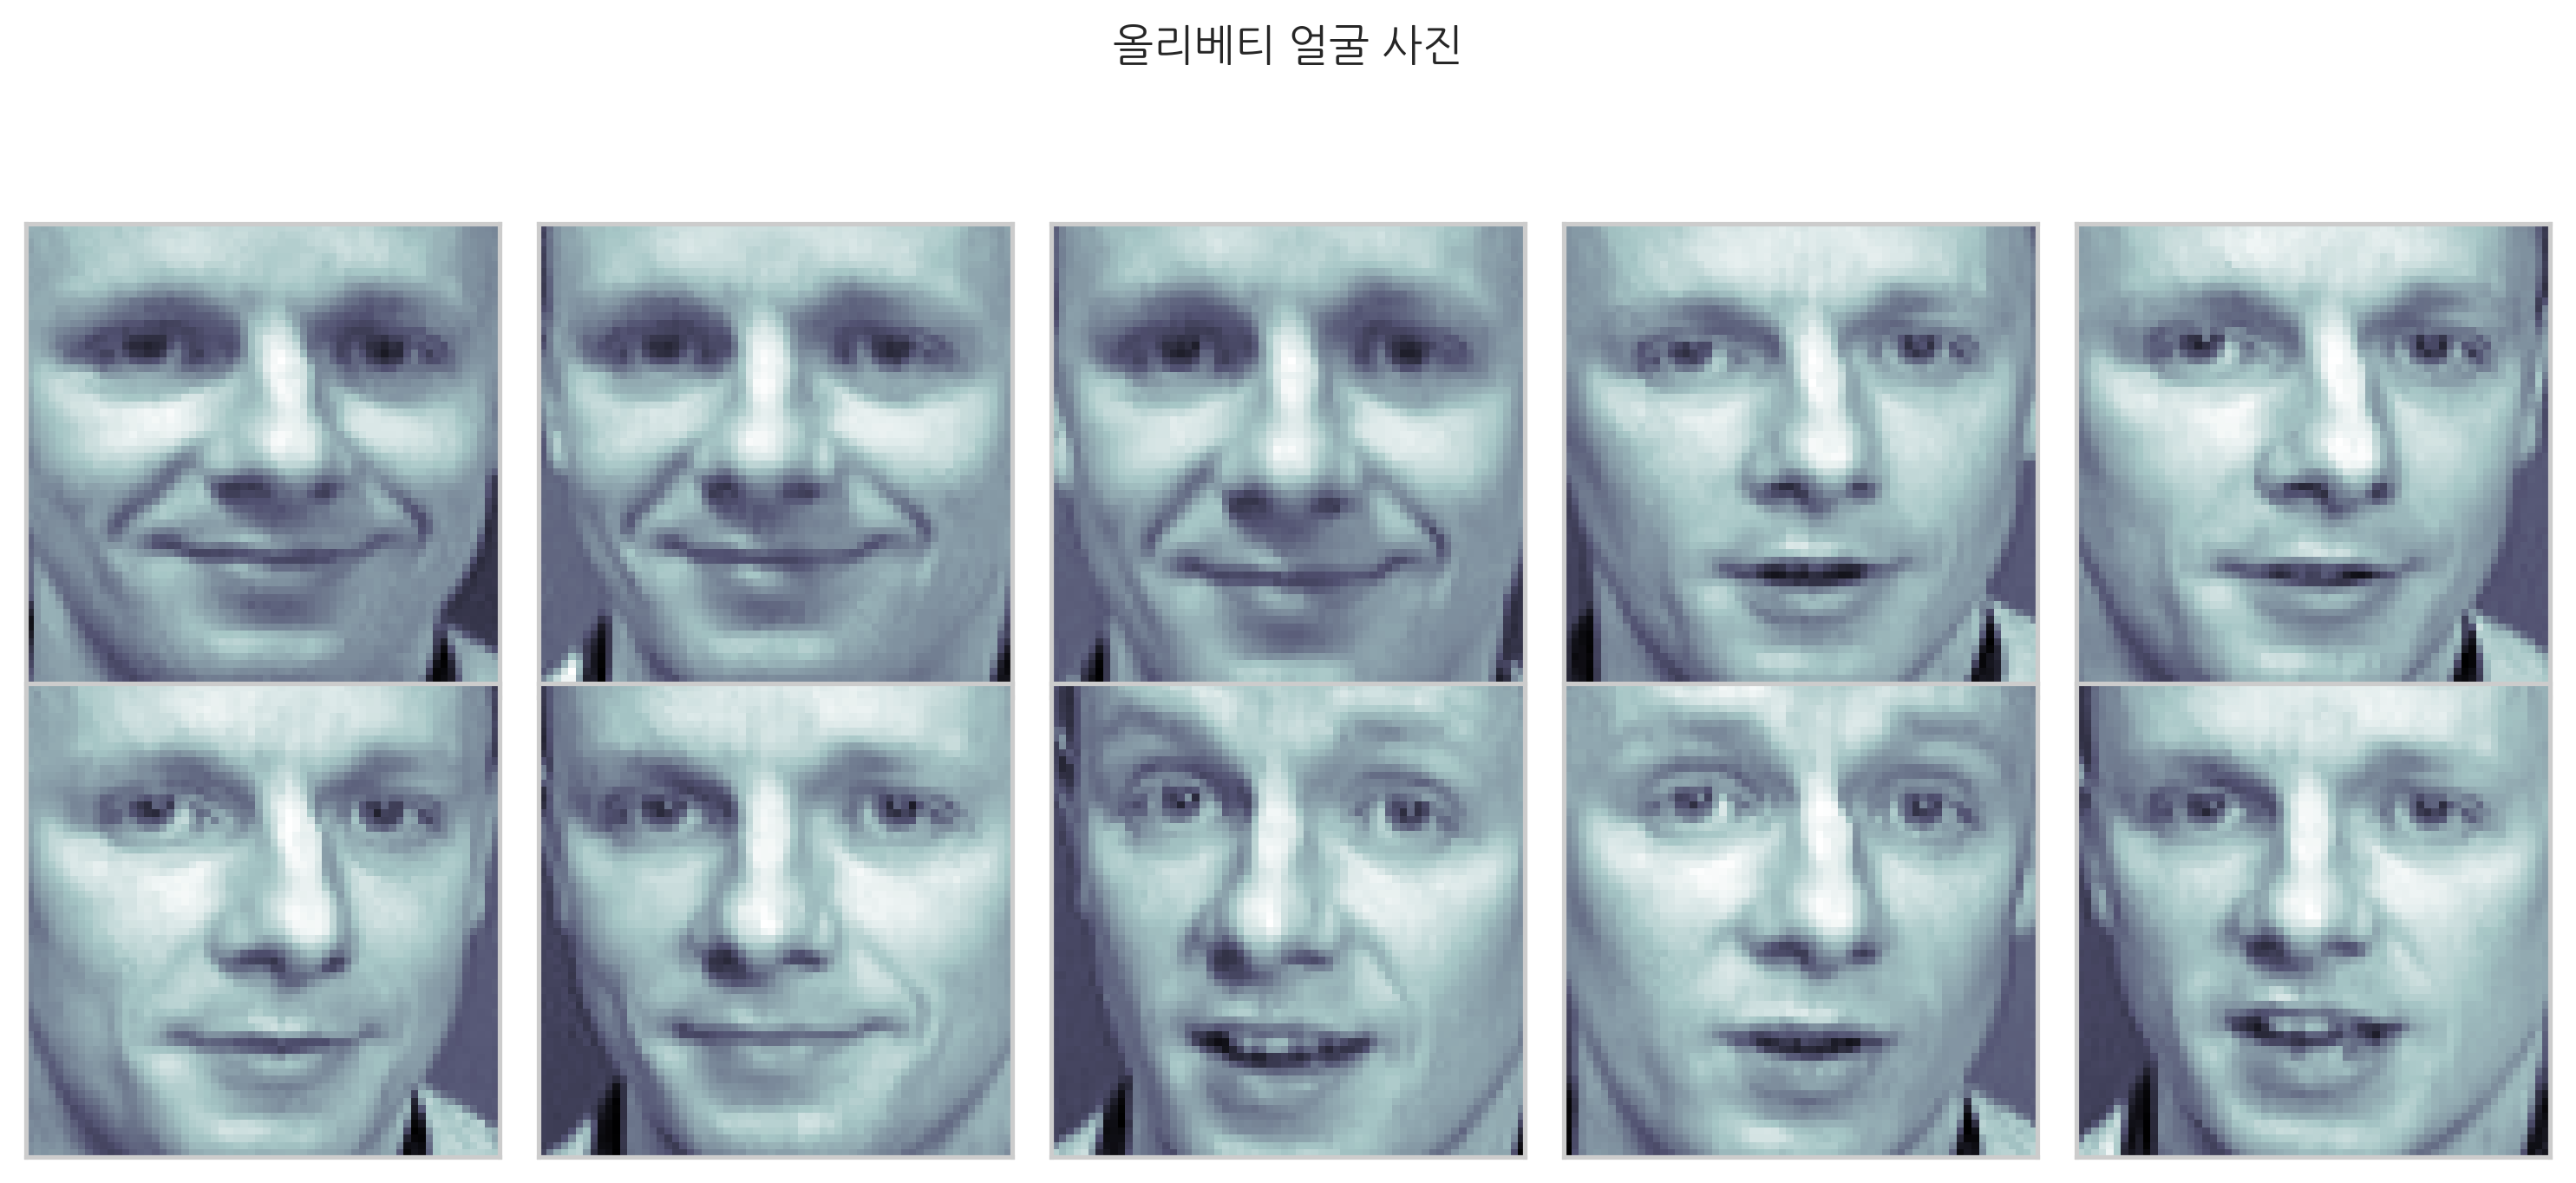

In [4]:
from sklearn.datasets import fetch_olivetti_faces
faces_all = fetch_olivetti_faces()
K = 20 # 20번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]

N = 2
M = 5
fig = plt.figure(figsize = (10, 5))
plt.subplots_adjust(top = 1, bottom = 0, hspace=0, wspace= 0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap = plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle('올리베티 얼굴 사진')
plt.tight_layout()
plt.show()

In [6]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components = 2)
X3 = faces_all.data[faces_all.target == K]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

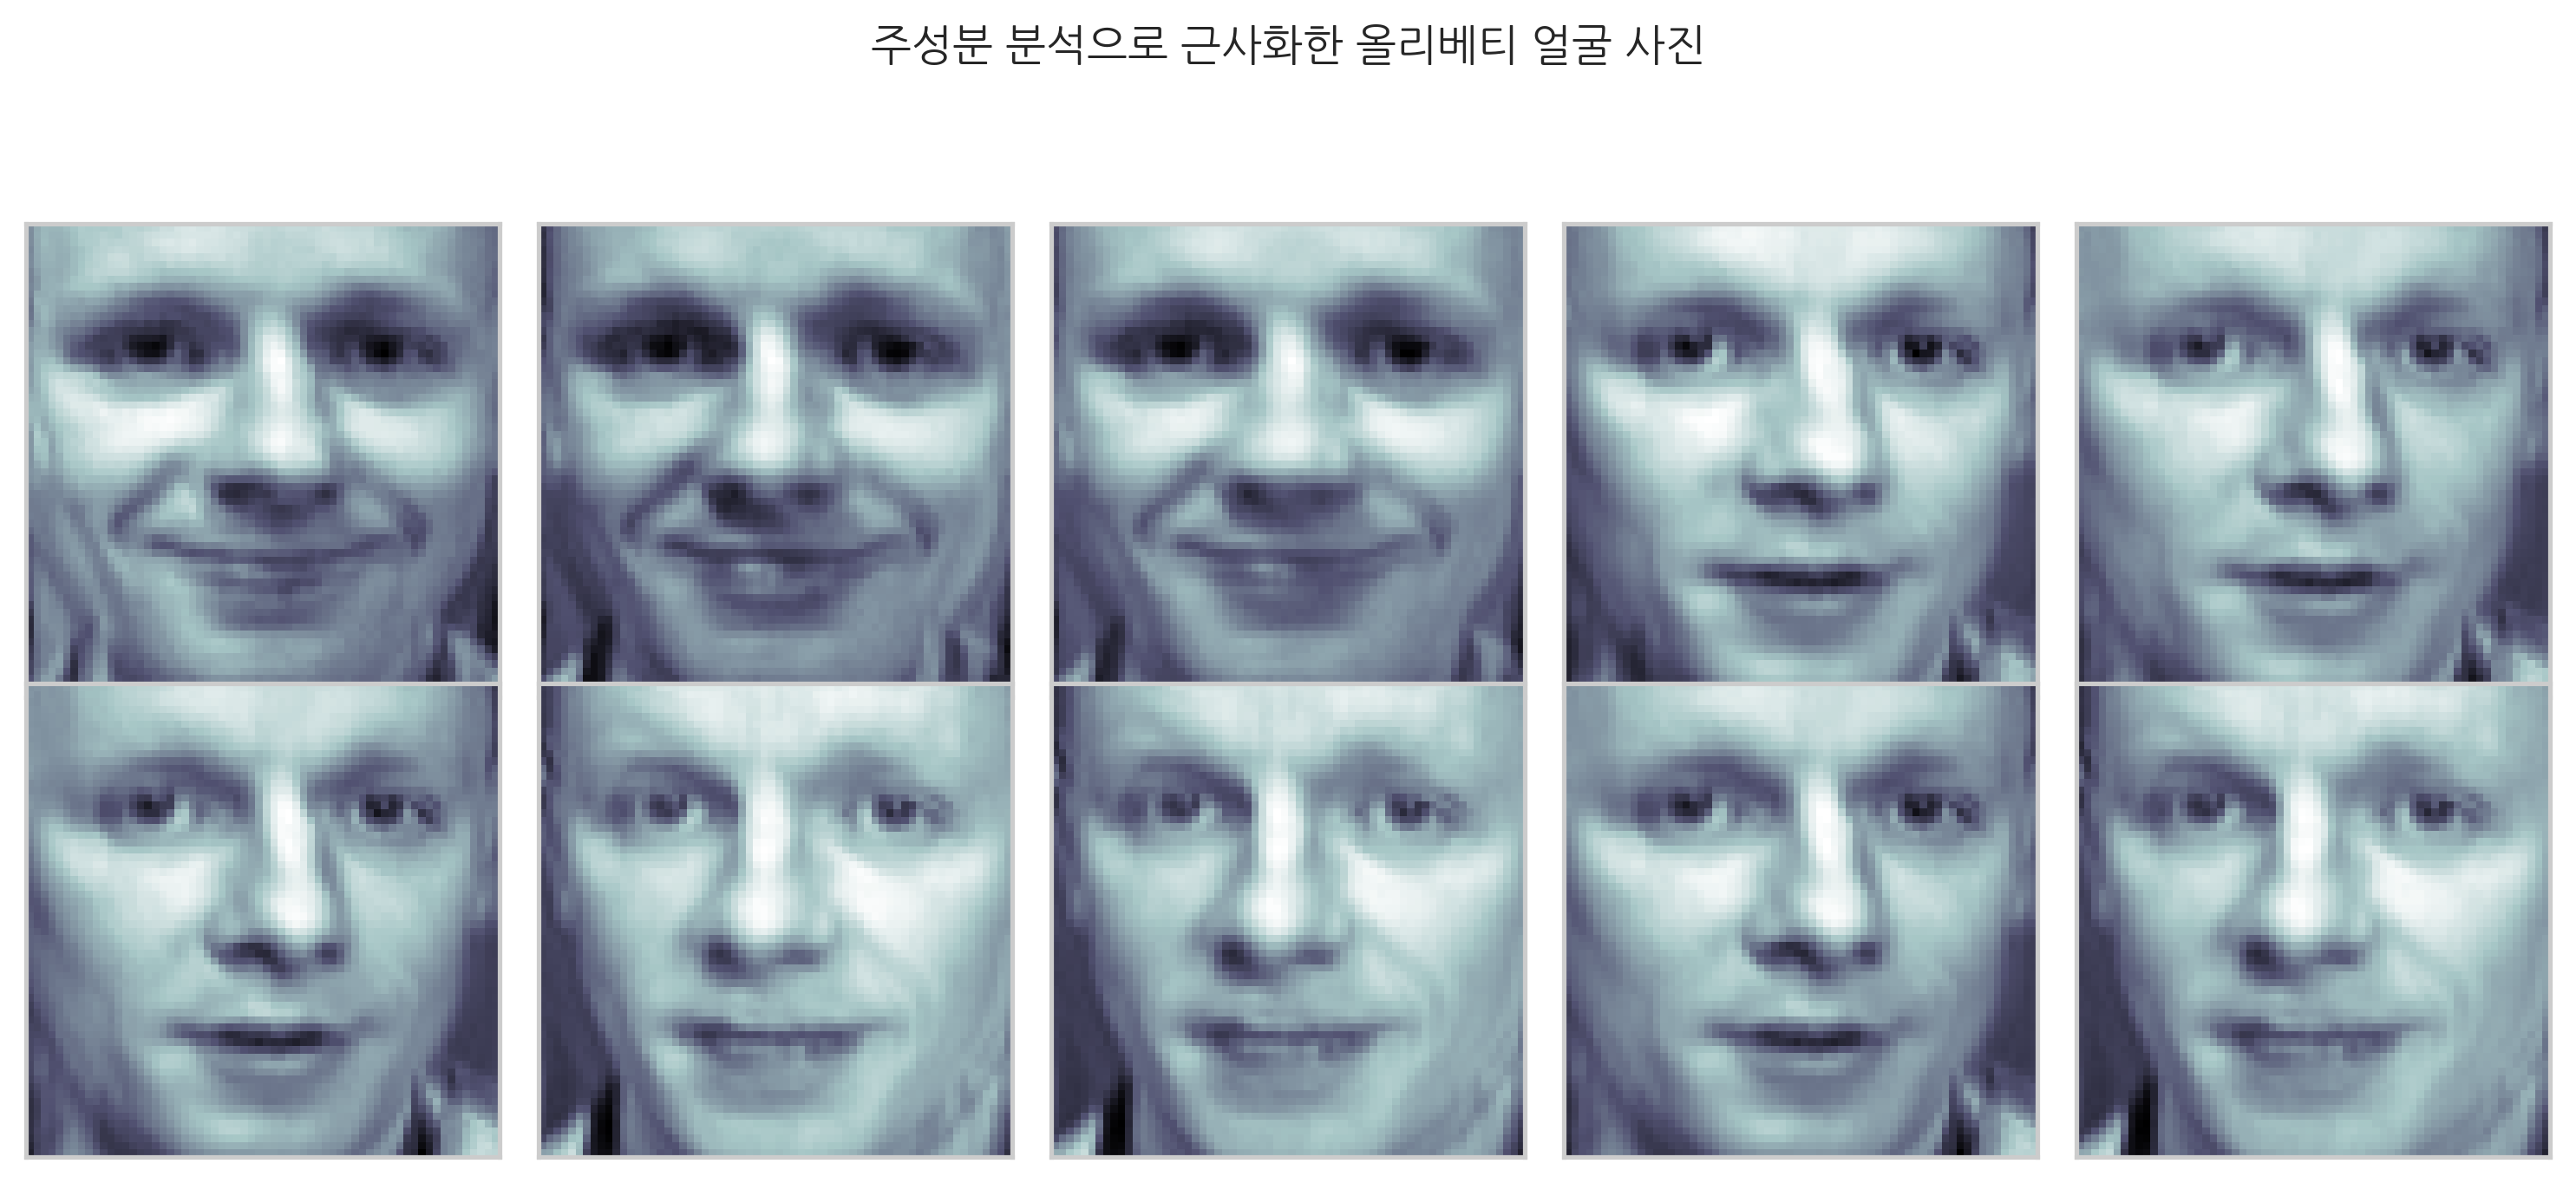

In [8]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64,64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle('주성분 분석으로 근사화한 올리베티 얼굴 사진')
plt.tight_layout()
plt.show()

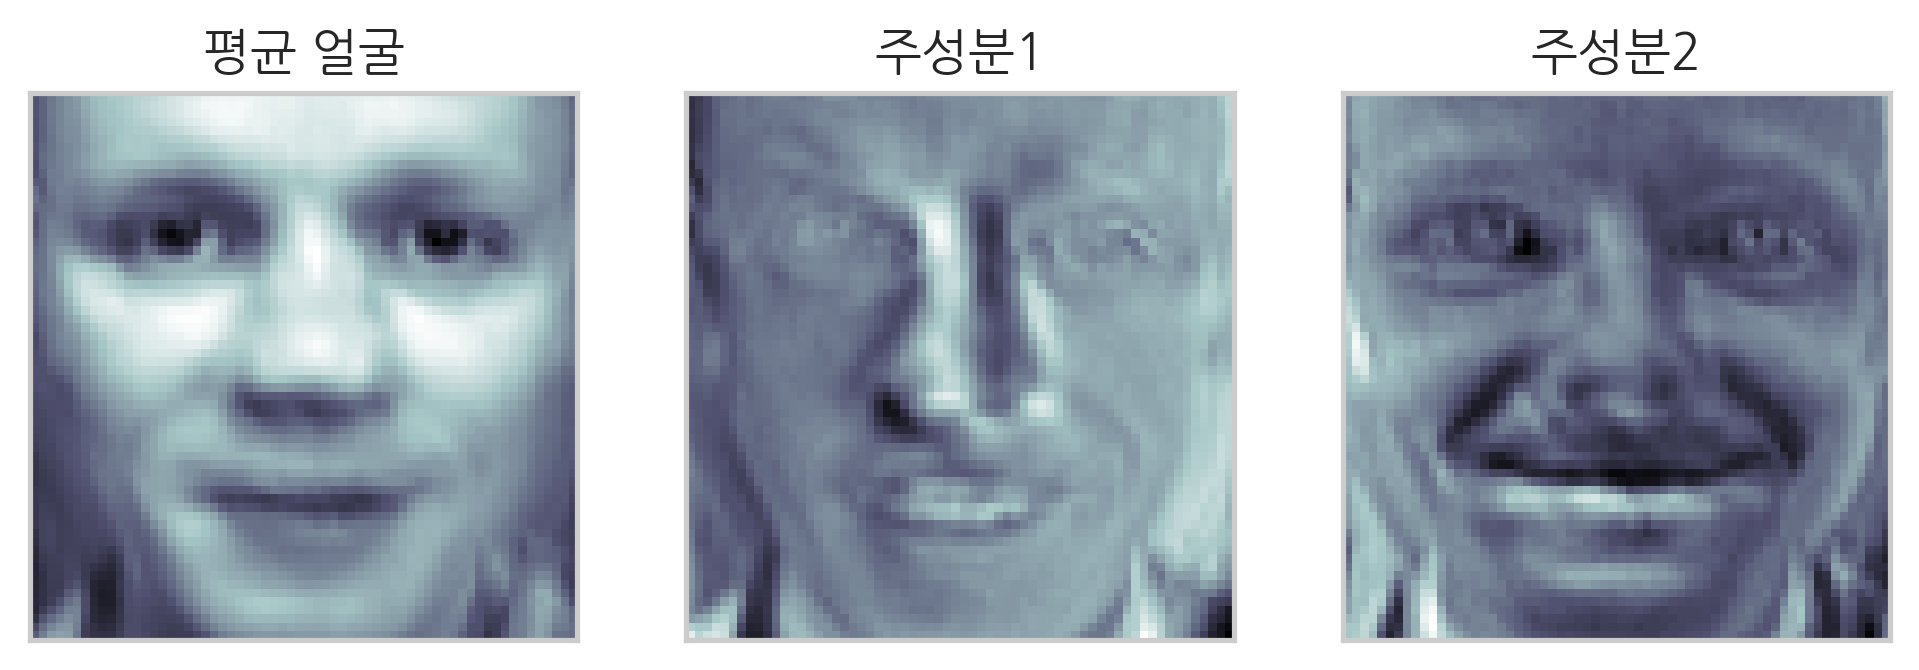

In [9]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap = plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('평균 얼굴')
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('주성분1')
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('주성분2')
plt.show()

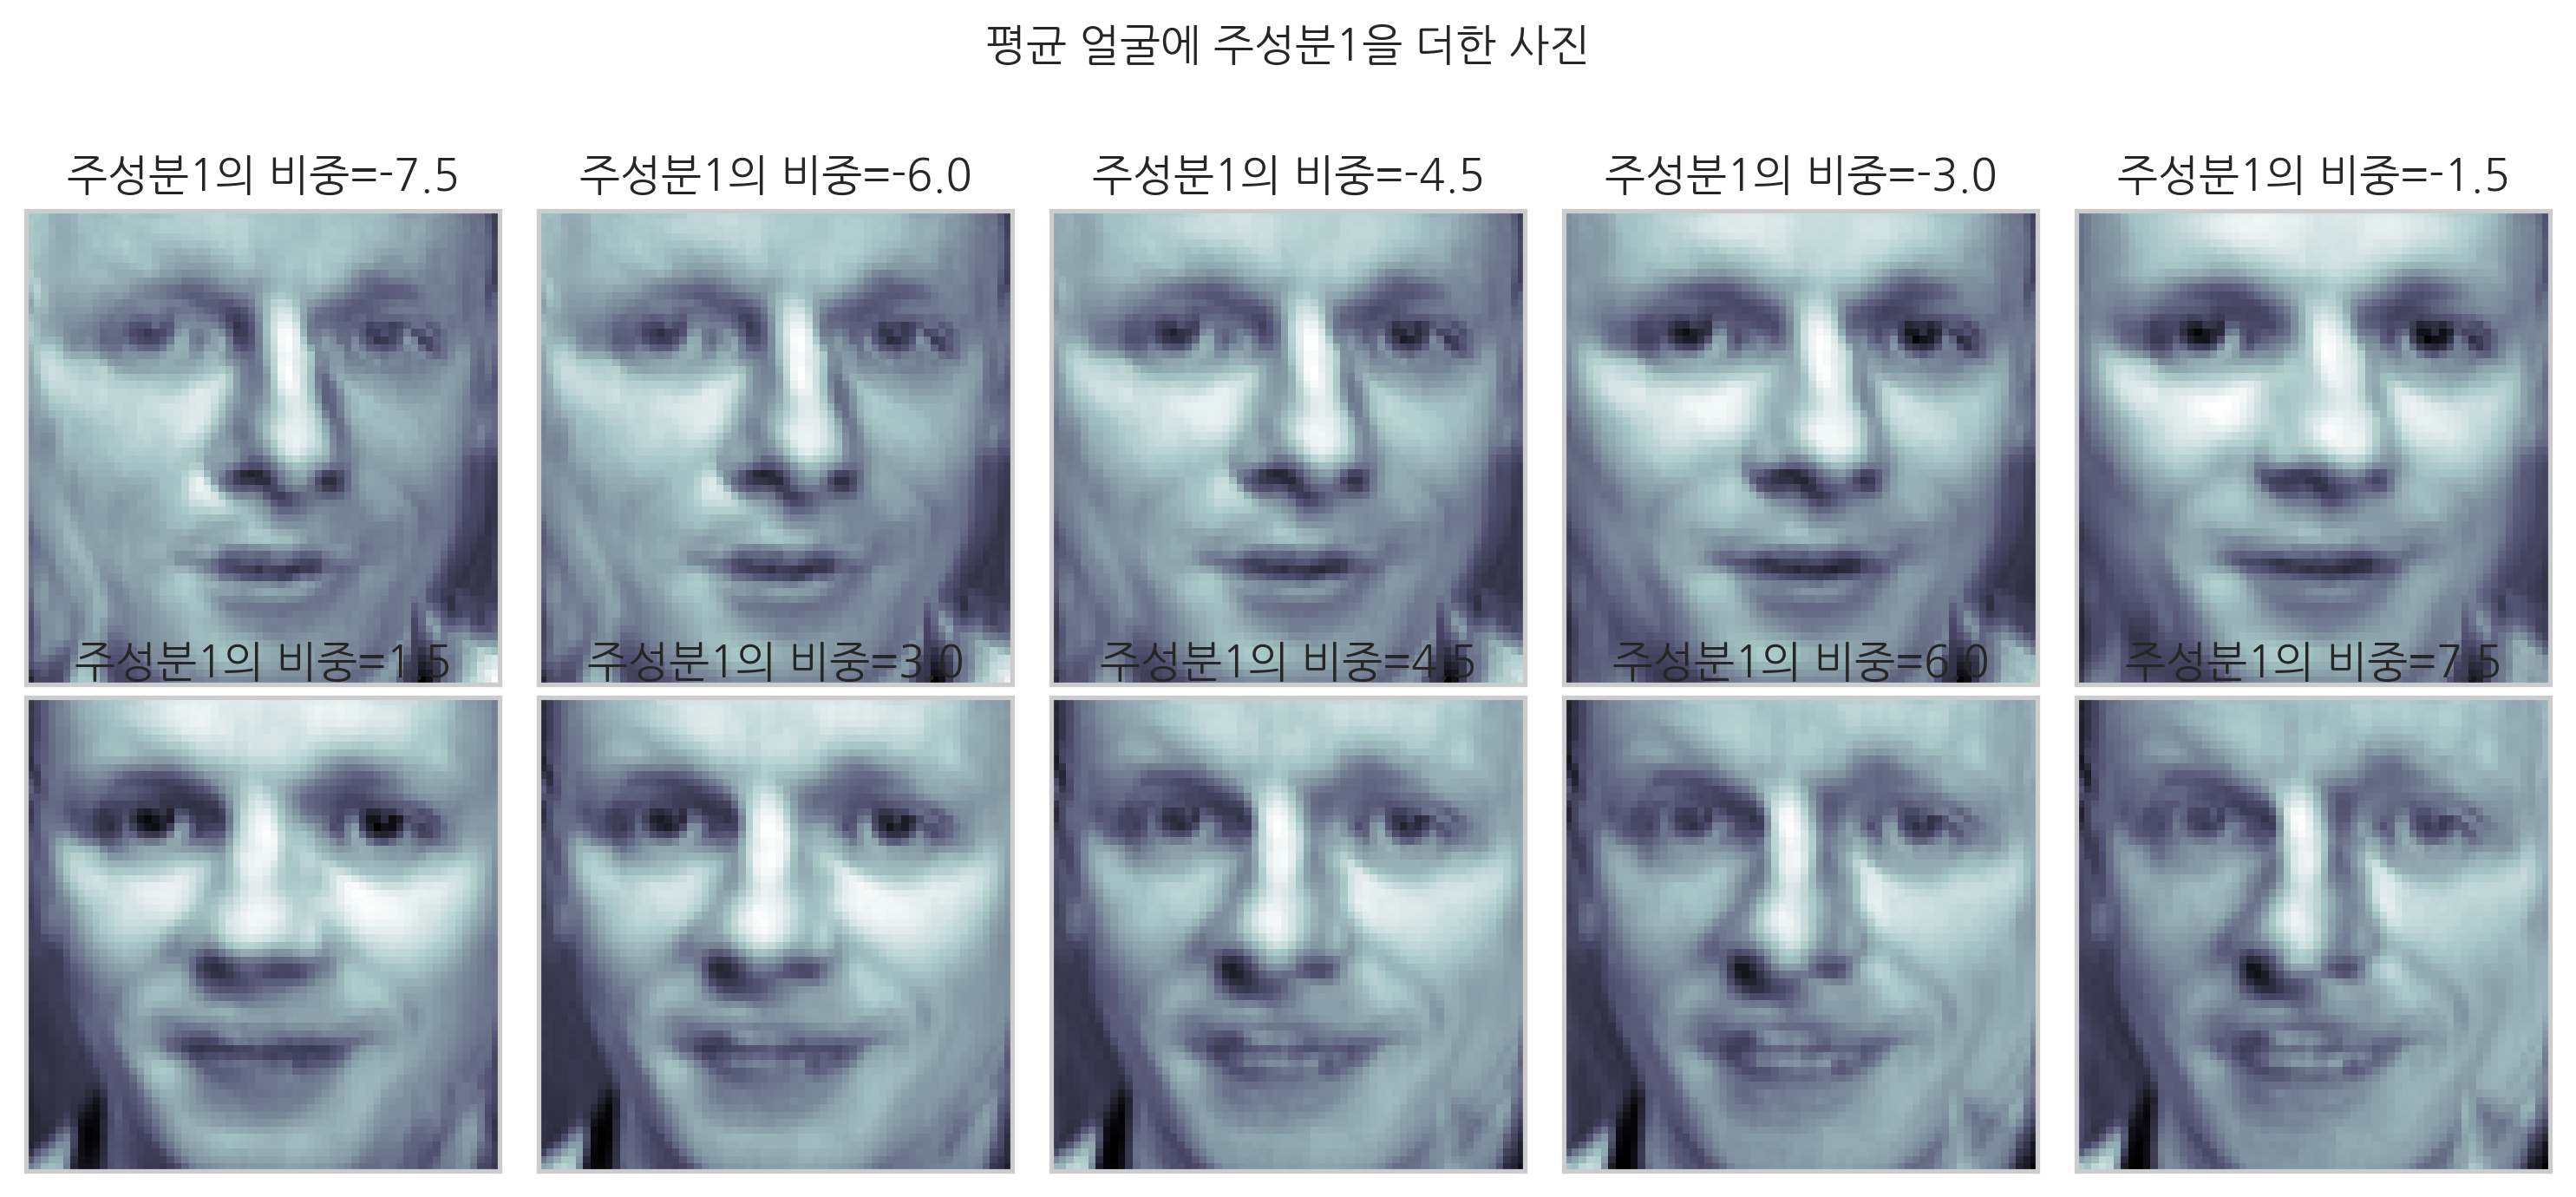

In [10]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k-5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title('주성분1의 비중={}'.format(w))
plt.suptitle('평균 얼굴에 주성분1을 더한 사진')
plt.tight_layout()
plt.show()

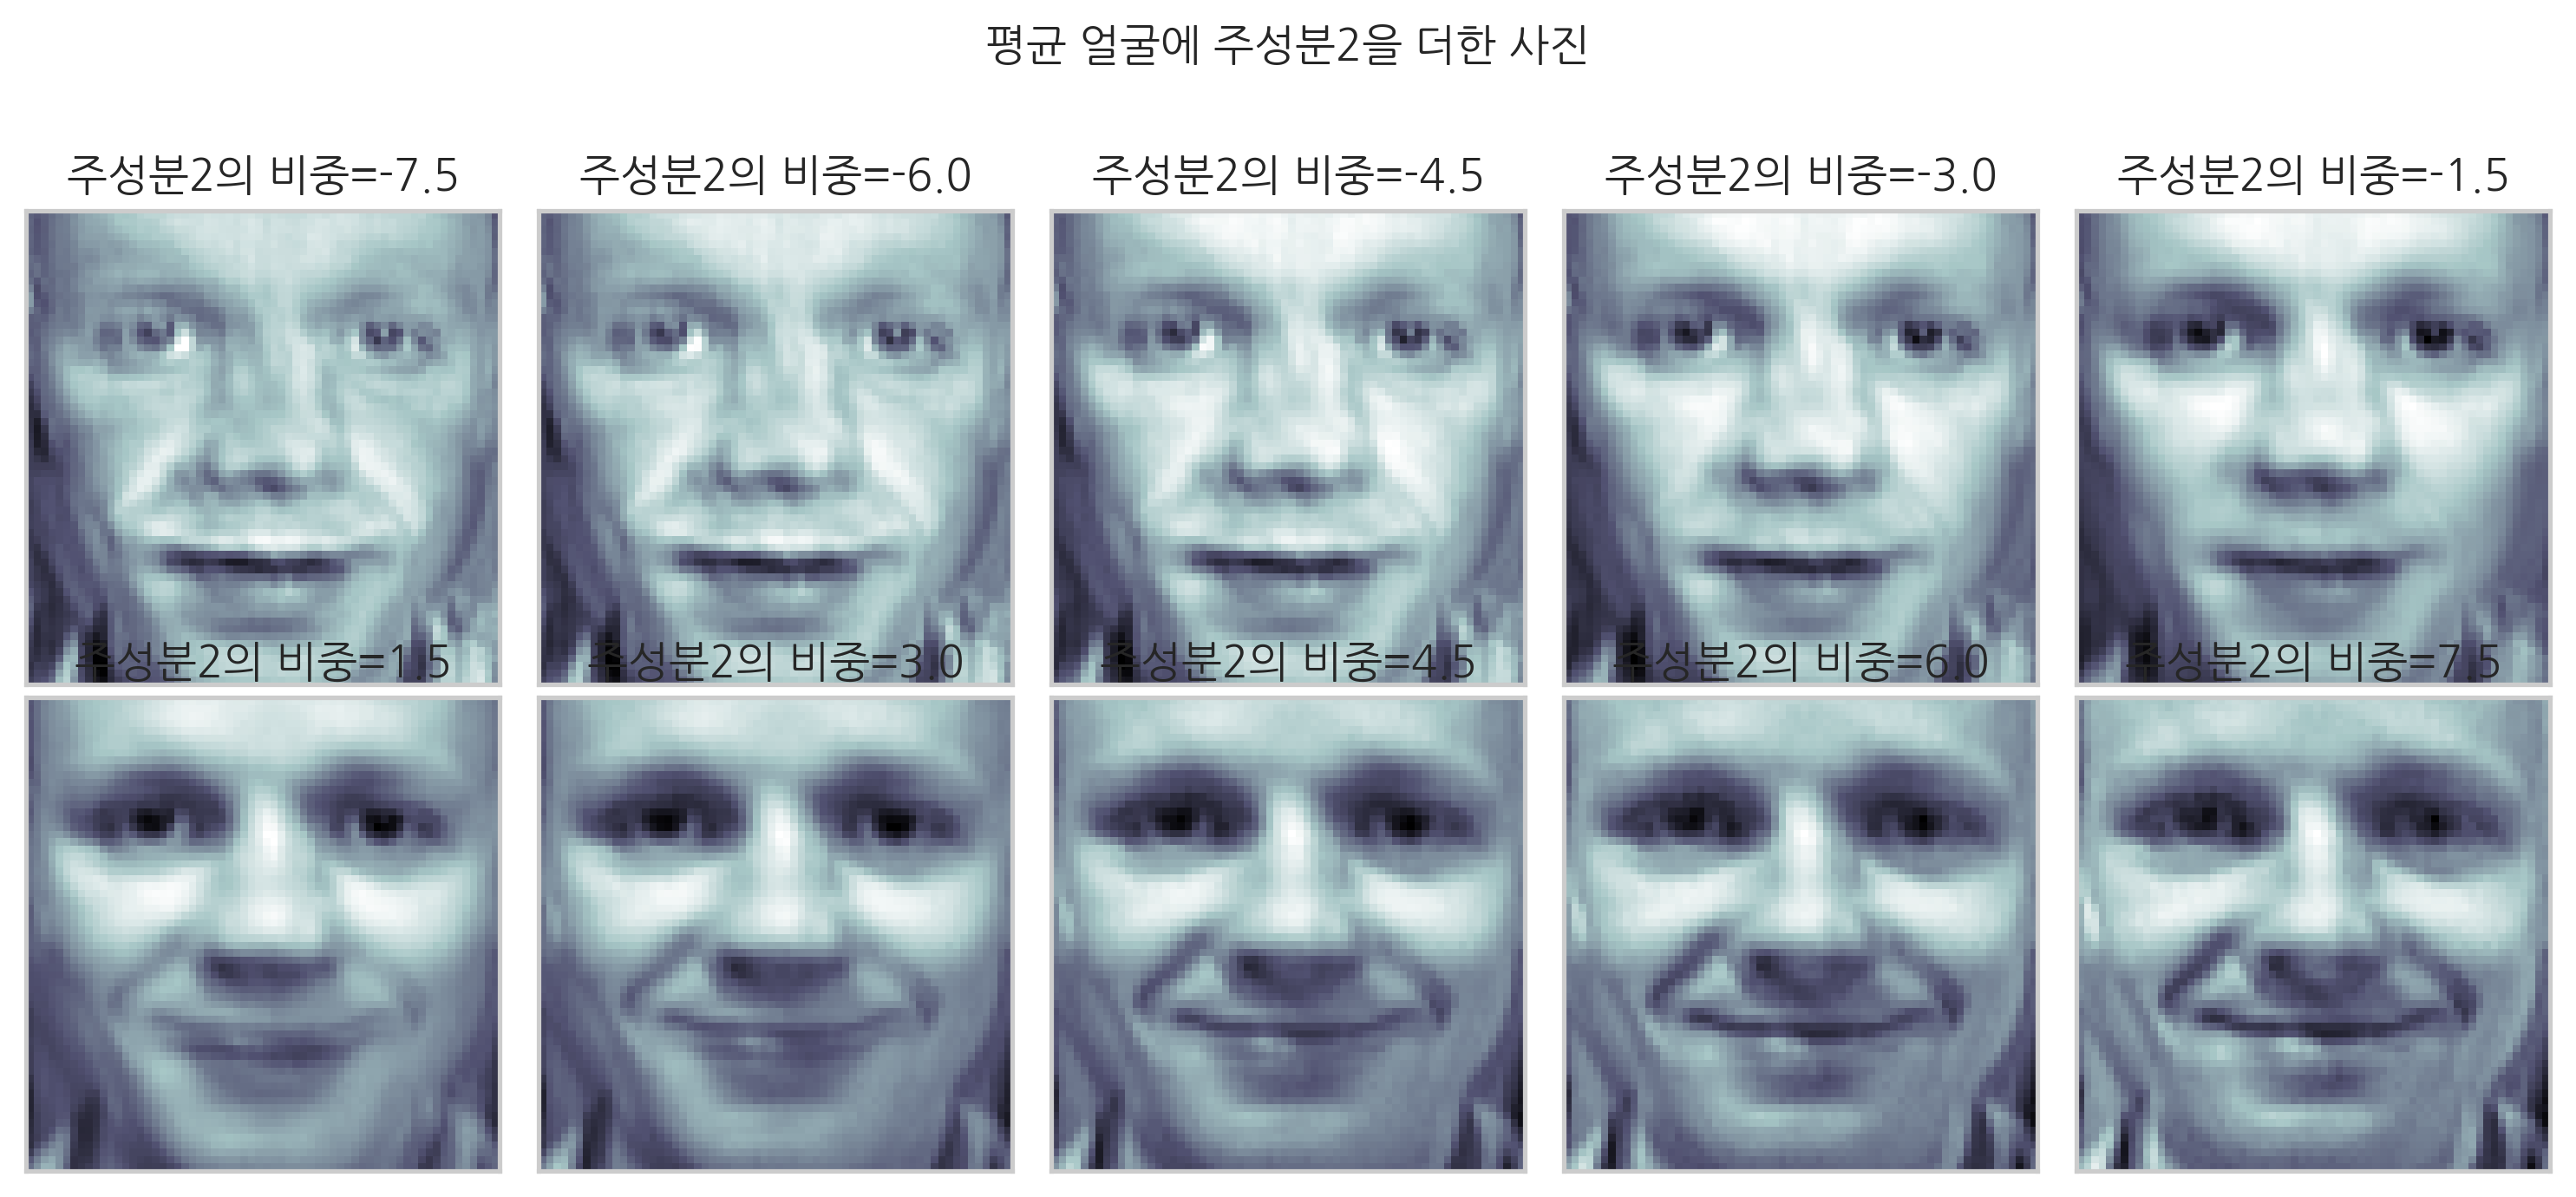

In [11]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k-5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title('주성분2의 비중={}'.format(w))
plt.suptitle('평균 얼굴에 주성분2을 더한 사진')
plt.tight_layout()
plt.show()

### 연습문제 3.5.2

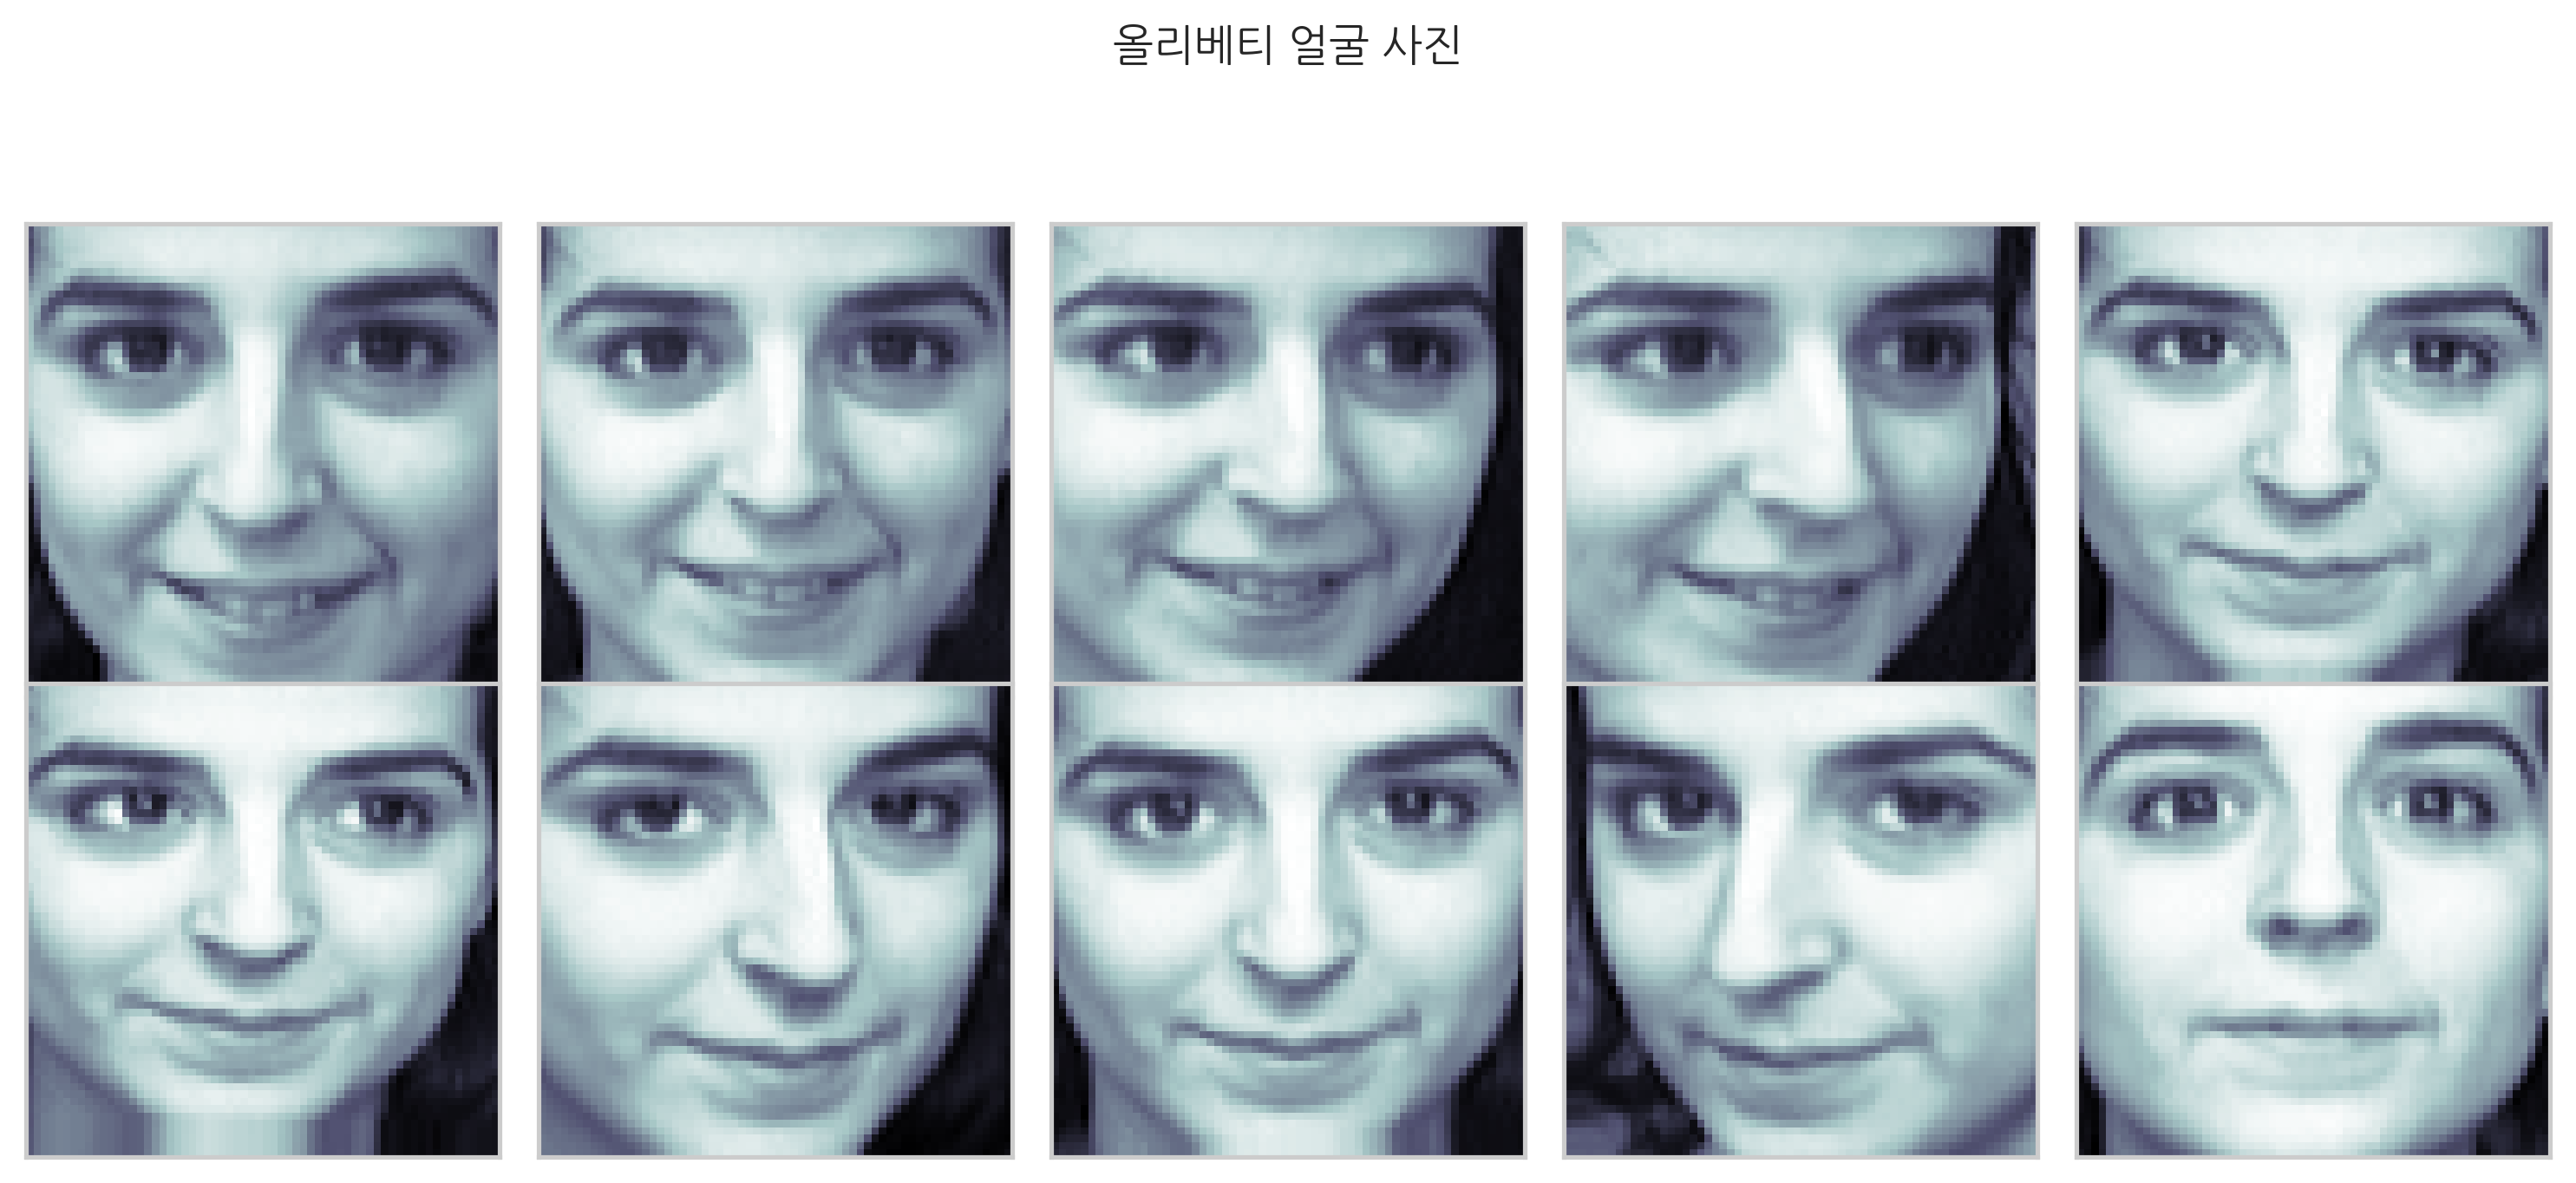

In [18]:
from sklearn.datasets import fetch_olivetti_faces
faces_all = fetch_olivetti_faces()
K = 9 # 9번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]

N = 2
M = 5
fig = plt.figure(figsize = (10, 5))
plt.subplots_adjust(top = 1, bottom = 0, hspace=0, wspace= 0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap = plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle('올리베티 얼굴 사진')
plt.tight_layout()
plt.show()

In [19]:
from sklearn.decomposition import PCA
pca4 = PCA(n_components = 2)
X4 = faces_all.data[faces_all.target == K]
W4 = pca4.fit_transform(X4)
X42 = pca4.inverse_transform(W4)

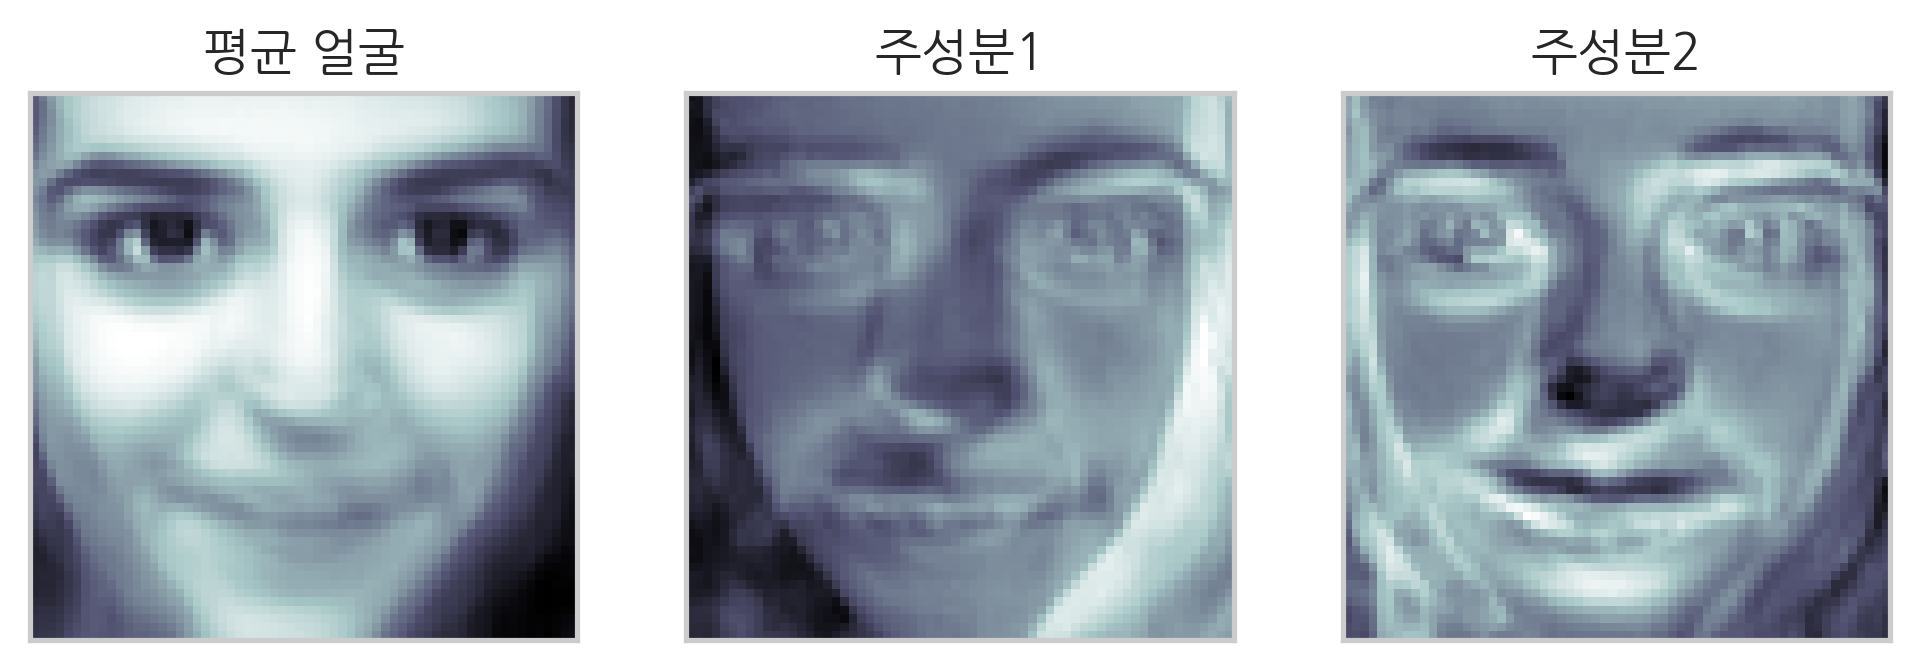

In [21]:
face_mean = pca4.mean_.reshape(64, 64)
face_p1 = pca4.components_[0].reshape(64, 64)
face_p2 = pca4.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap = plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('평균 얼굴')
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('주성분1')
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('주성분2')
plt.show()

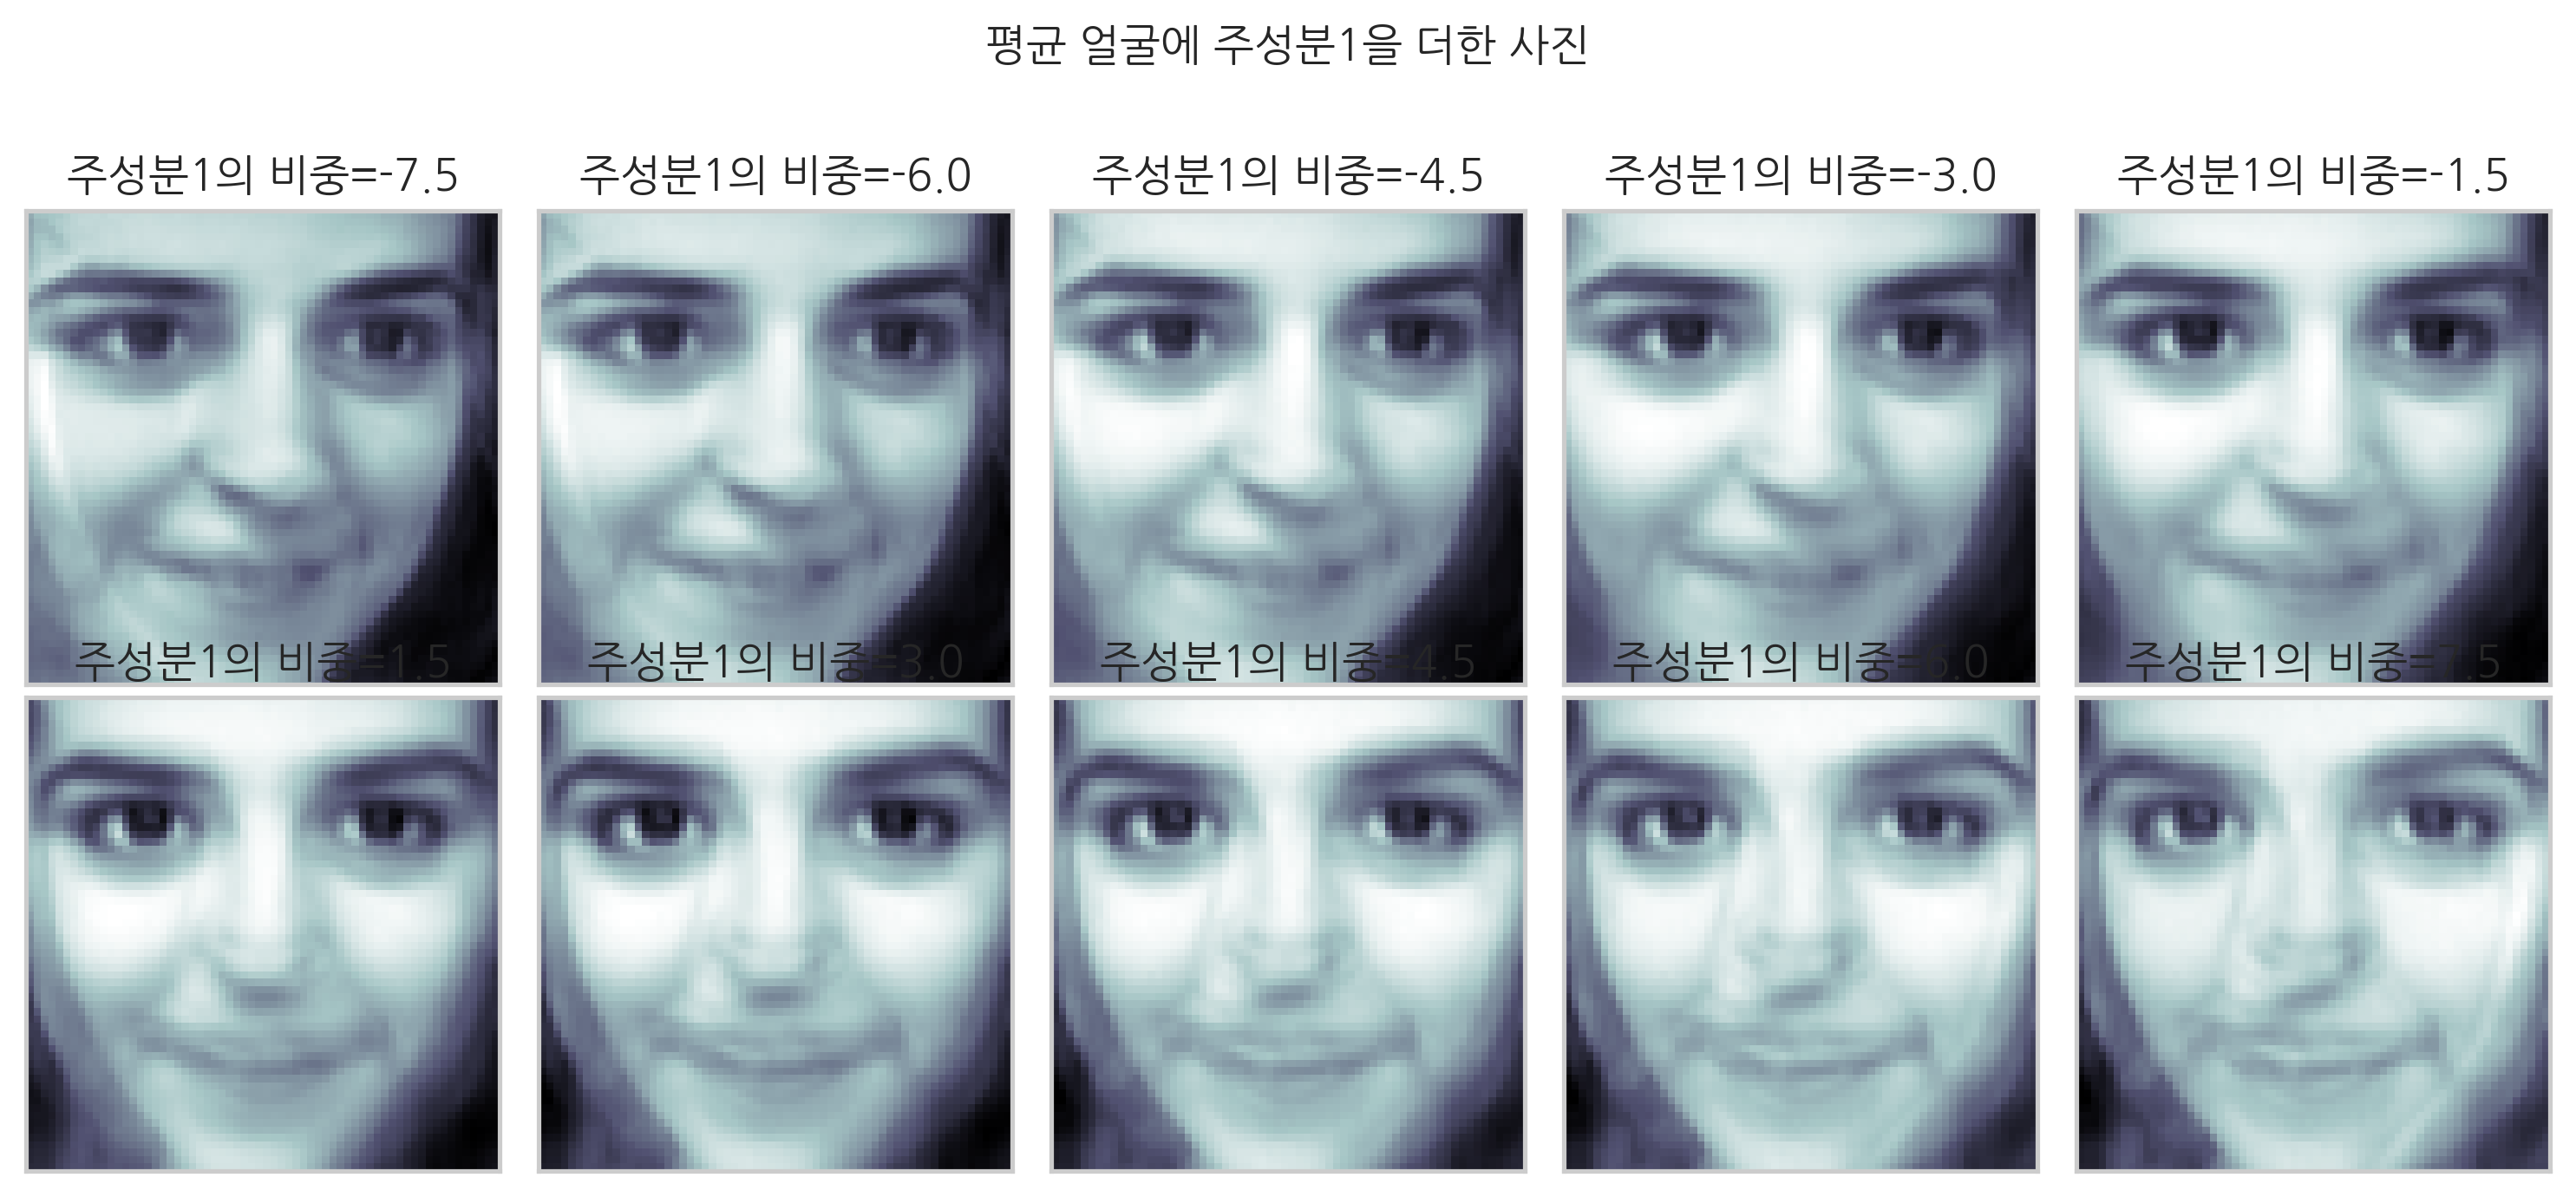

In [23]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k-5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title('주성분1의 비중={}'.format(w))
plt.suptitle('평균 얼굴에 주성분1을 더한 사진')
plt.tight_layout()
plt.show()

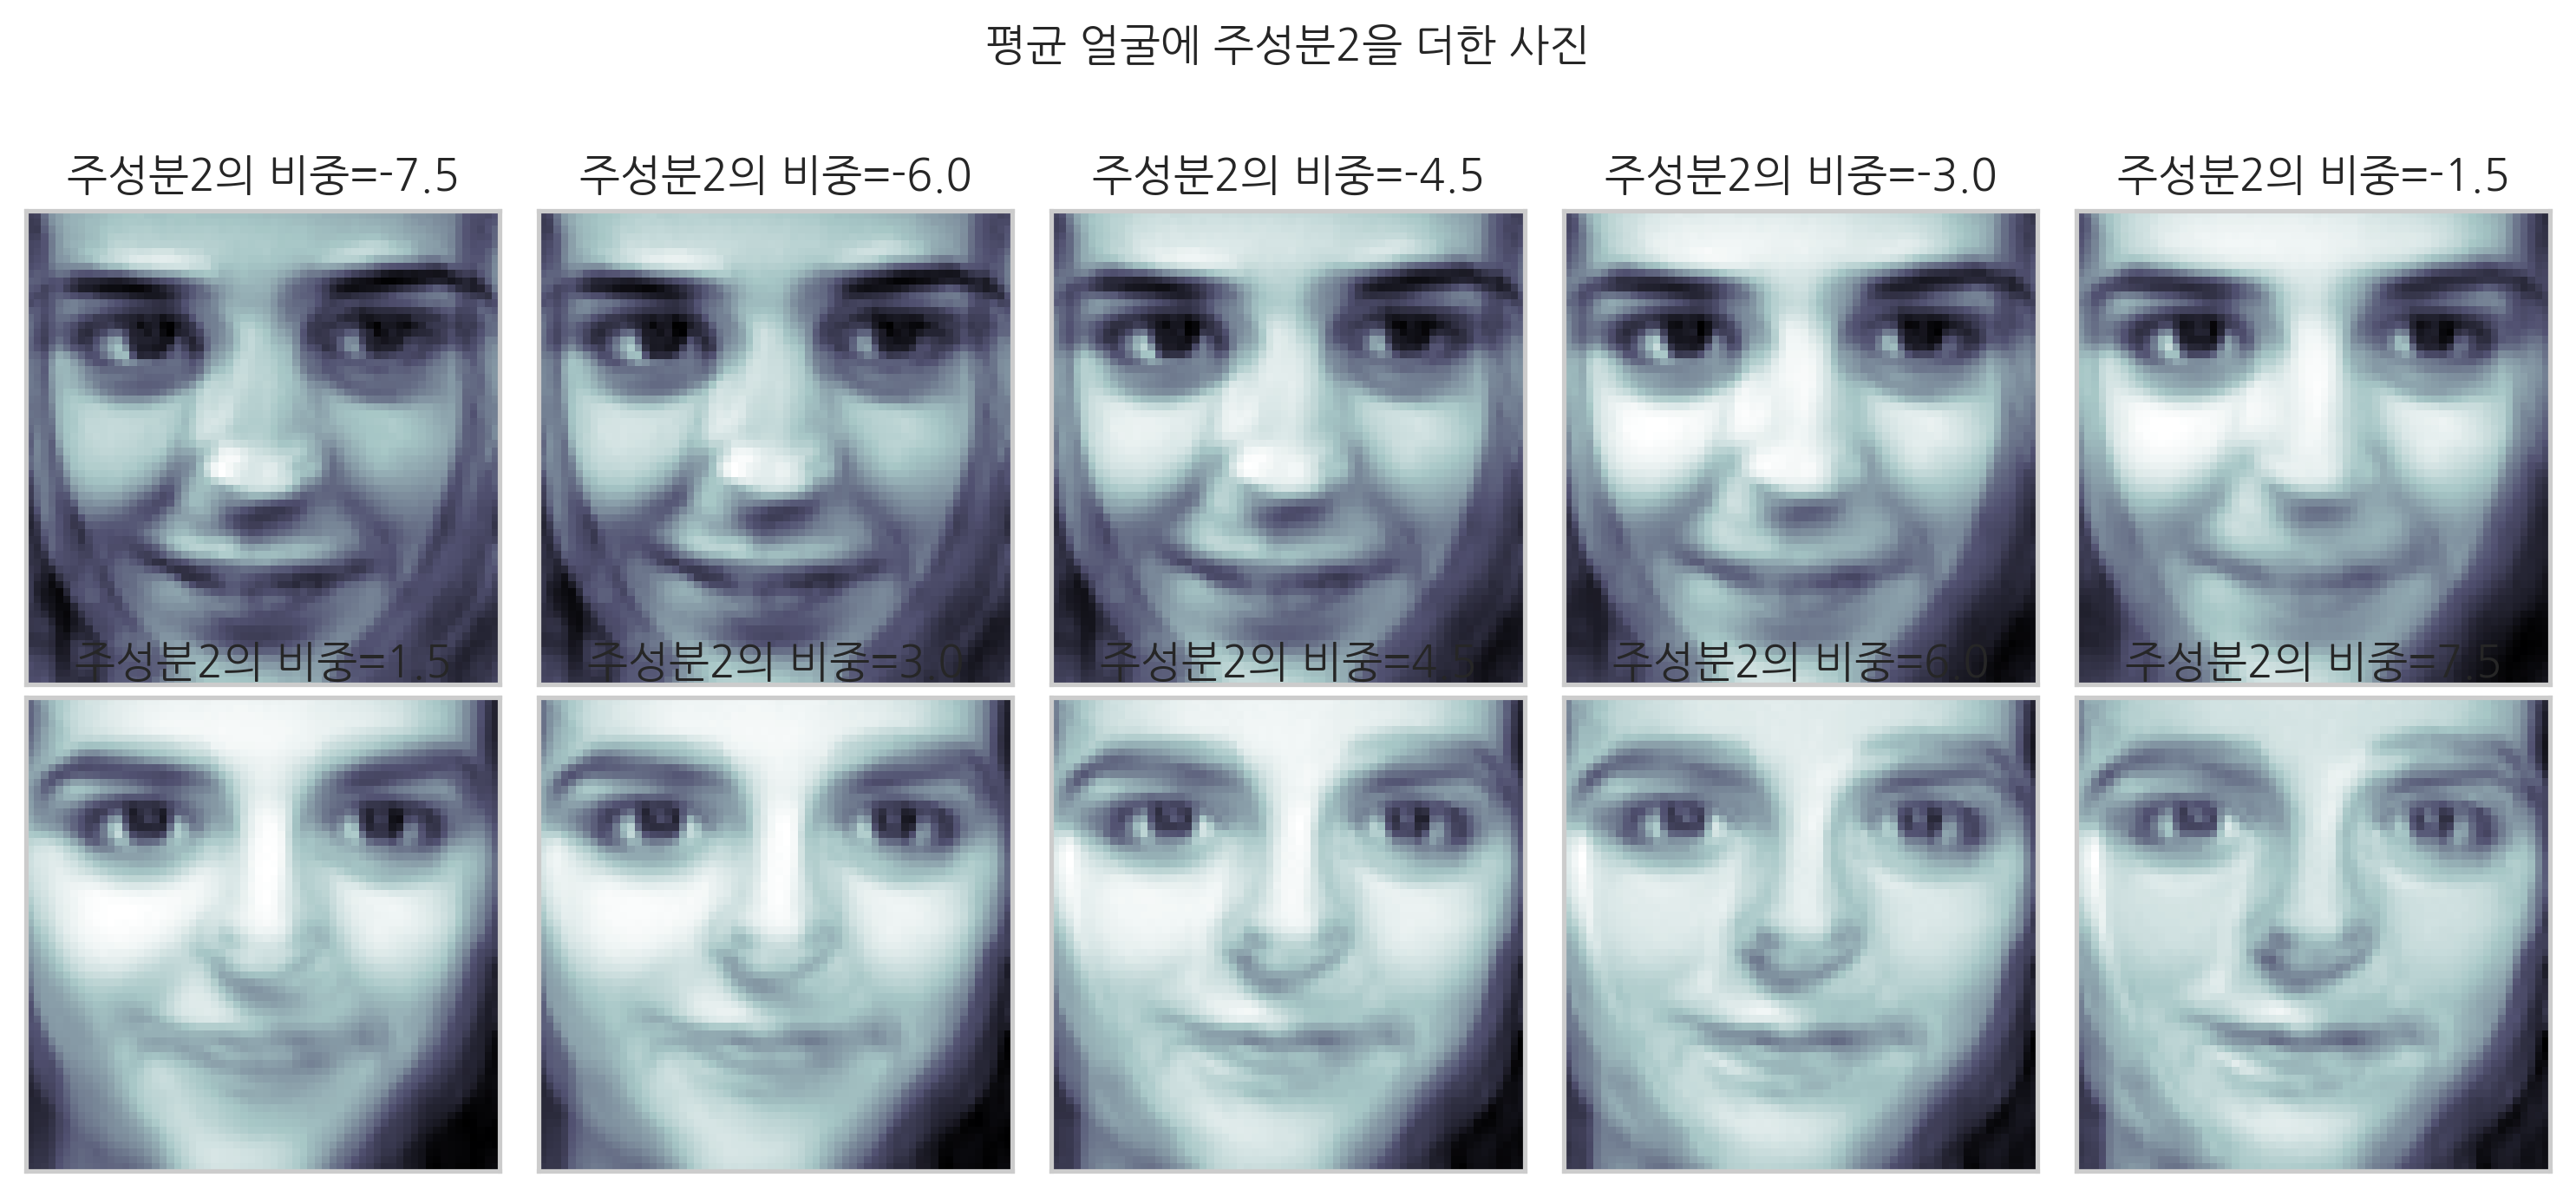

In [24]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k-5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title('주성분2의 비중={}'.format(w))
plt.suptitle('평균 얼굴에 주성분2을 더한 사진')
plt.tight_layout()
plt.show()

### 주식 가격의 PCA

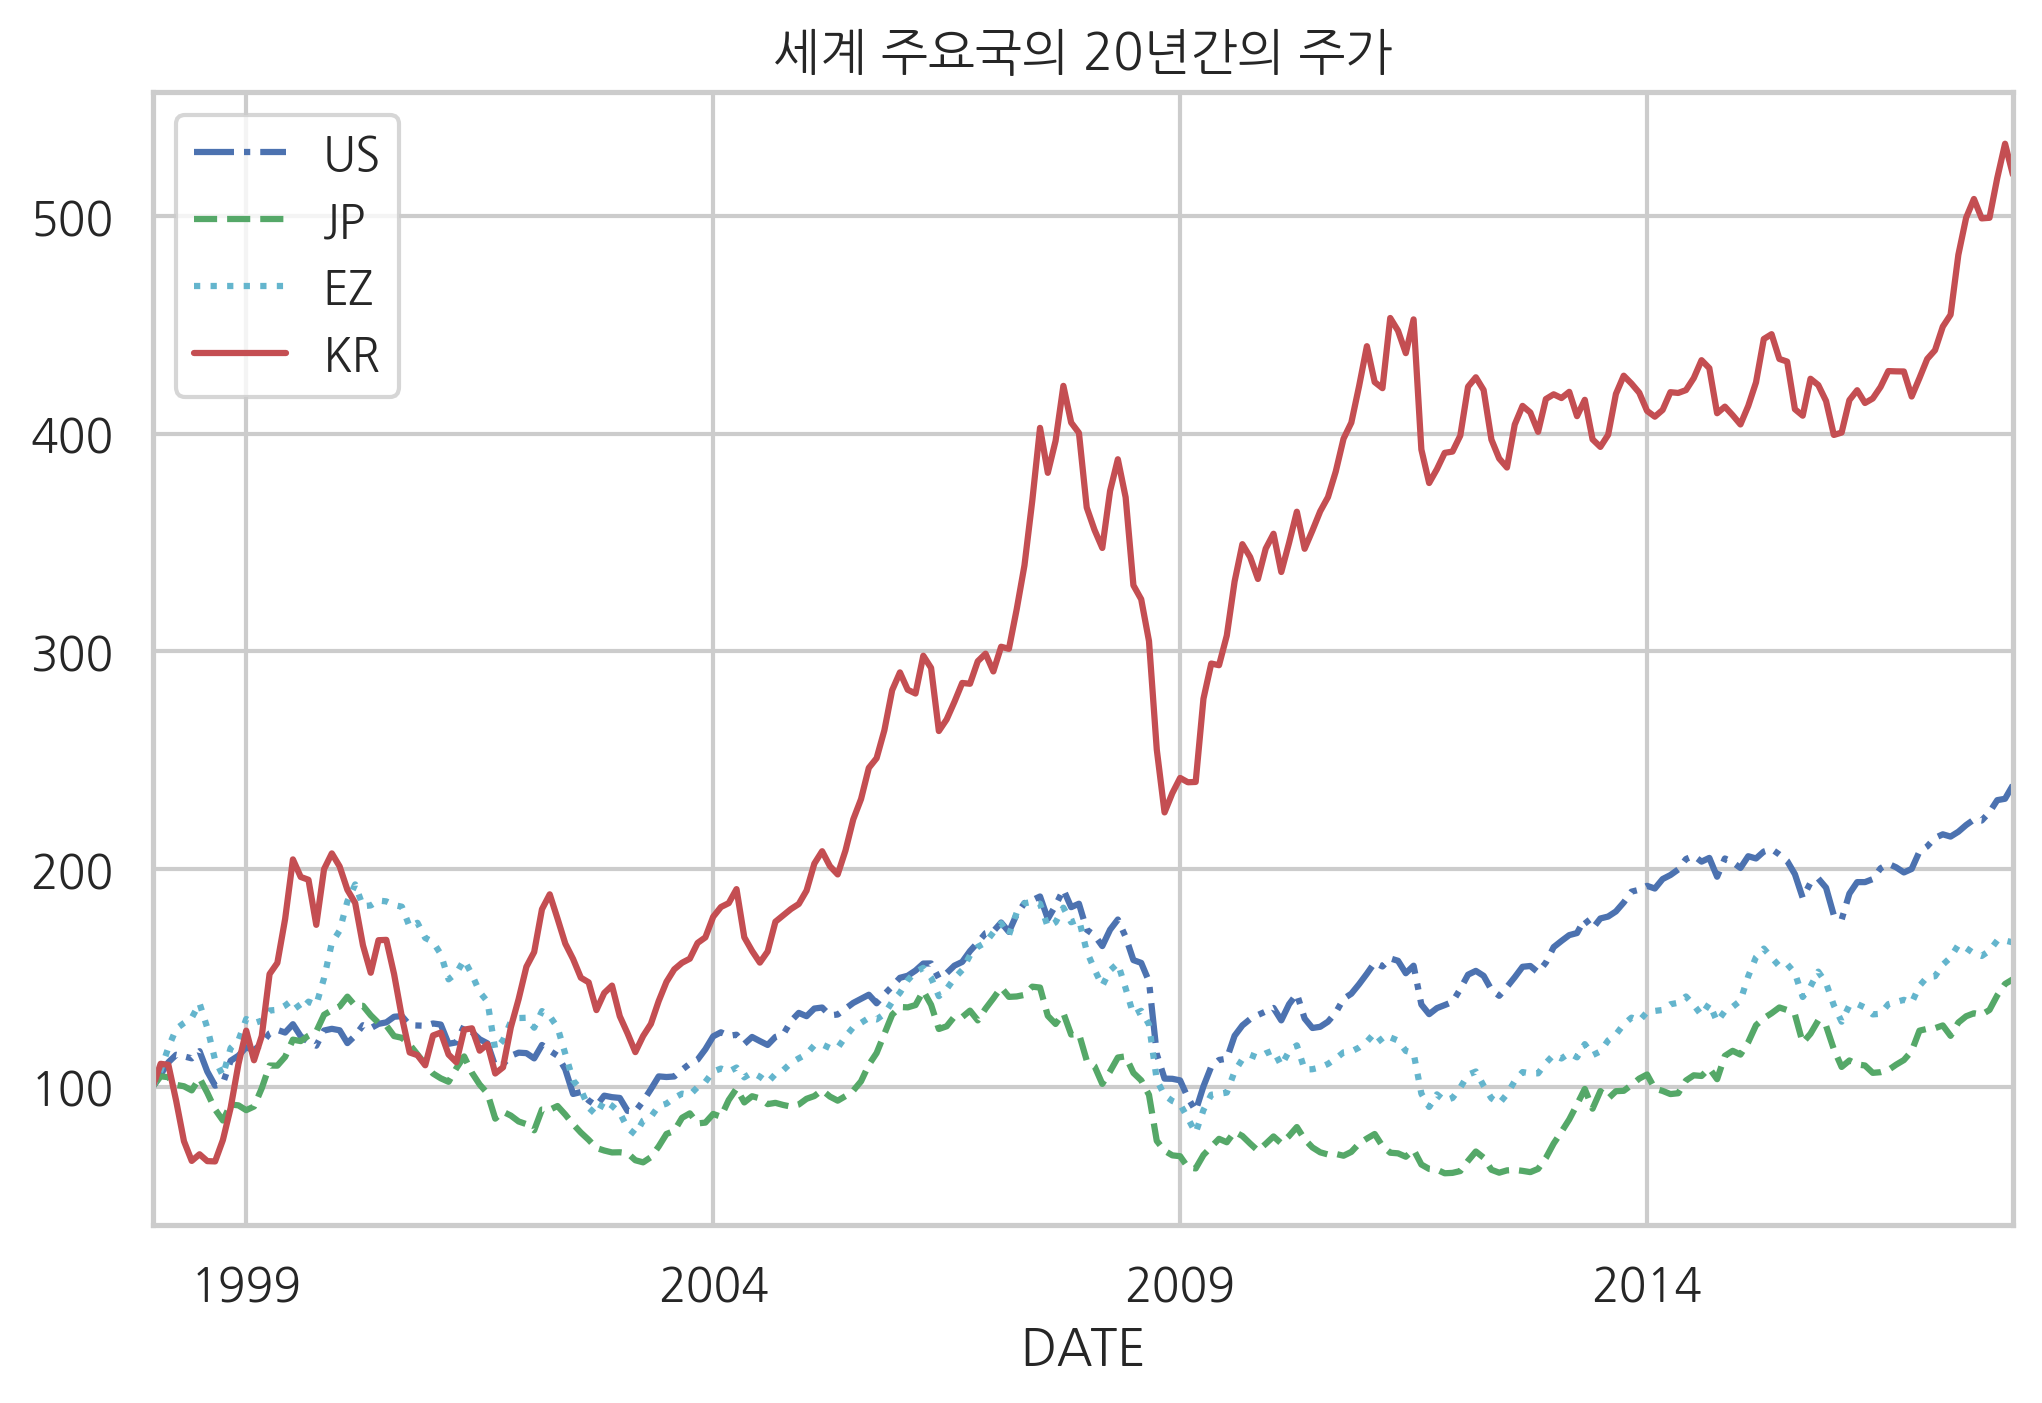

In [31]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime

symbols = [
    "SPASTT01USM661N", # US: 미국
    "SPASTT01JPM661N", # JP: 일본
    "SPASTT01EZM661N", # EZ: 유럽
    "SPASTT01KRM661N", # KR: 한국
]

data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred', 
                               start=datetime.datetime(1998, 1, 1),
                               end=datetime.datetime(2017, 12, 31))[sym]
data.columns = ["US", "JP", "EZ", "KR"]
data = data / data.iloc[0] * 100

styles = ["b-.", "g--", "c:", "r-"]
data.plot(style=styles)
plt.title("세계 주요국의 20년간의 주가")
plt.show()

In [32]:
df = ((data.pct_change() + 1).resample("A").prod() - 1).T * 100
print(df.iloc[:, :5])

DATE  1998-12-31  1999-12-31  2000-12-31  2001-12-31  2002-12-31
US     14.249290   10.800392    1.094171   -9.638213  -17.680773
JP     -8.567915   47.802619  -18.365577  -23.827406  -16.923968
EZ     21.308040   36.872314    1.375330  -21.857080  -30.647772
KR     10.411582   87.623876  -46.975114   27.644005    4.448180


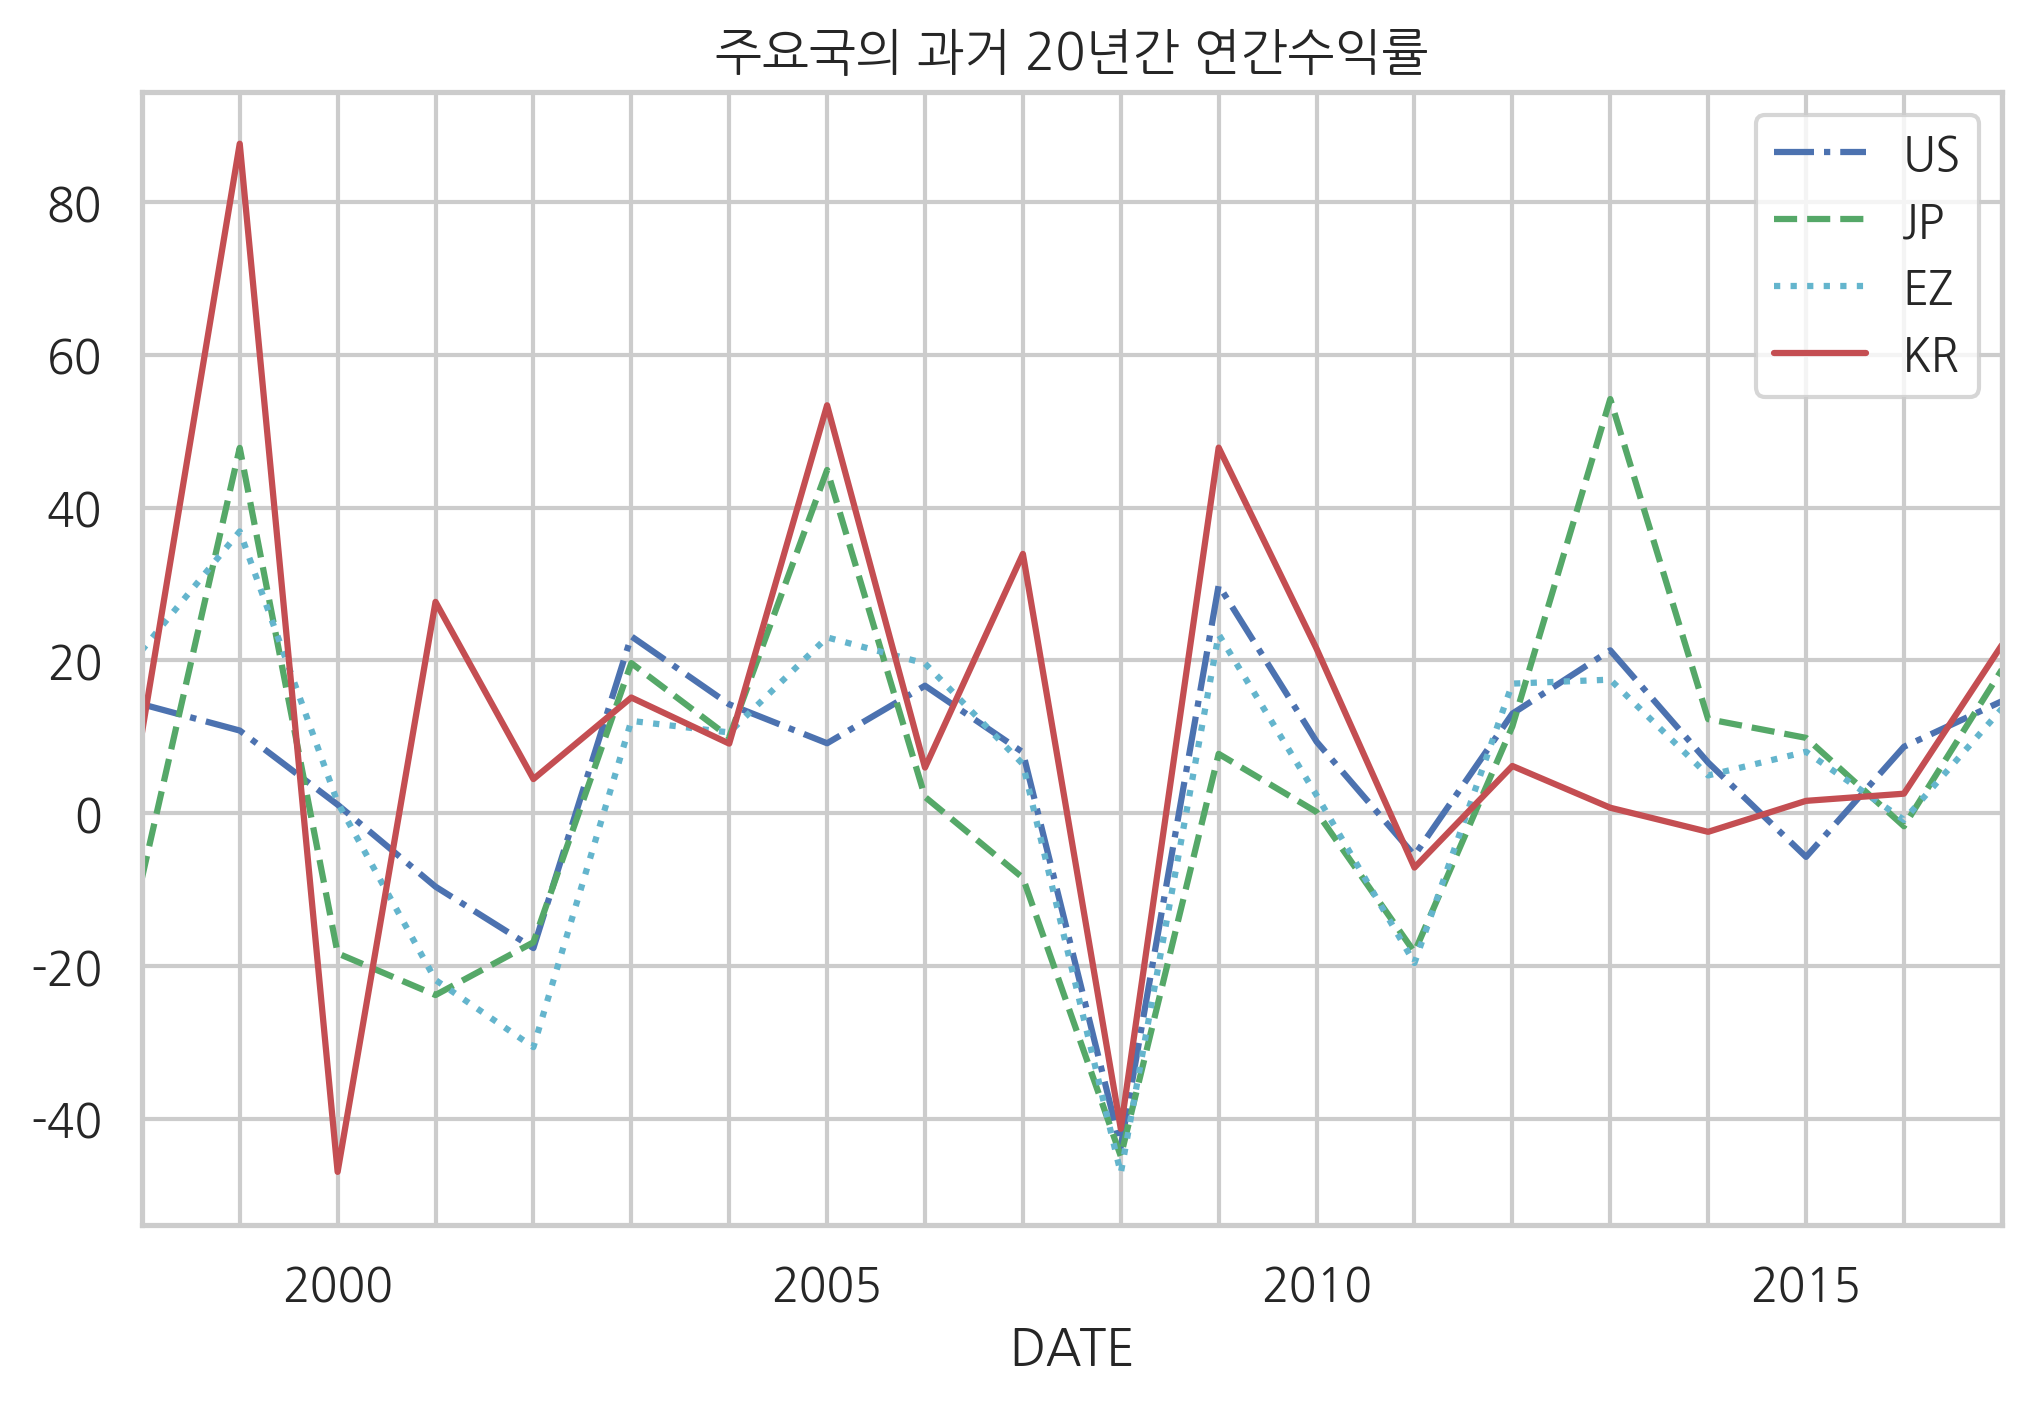

In [33]:
df.T.plot(style=styles)
plt.title("주요국의 과거 20년간 연간수익률")
plt.xticks(df.columns)
plt.show()

In [34]:
pca2 = PCA(n_components=1)
w = pca2.fit_transform(df)

In [35]:
m = pca2.mean_

In [36]:
p1 = pca2.components_[0]

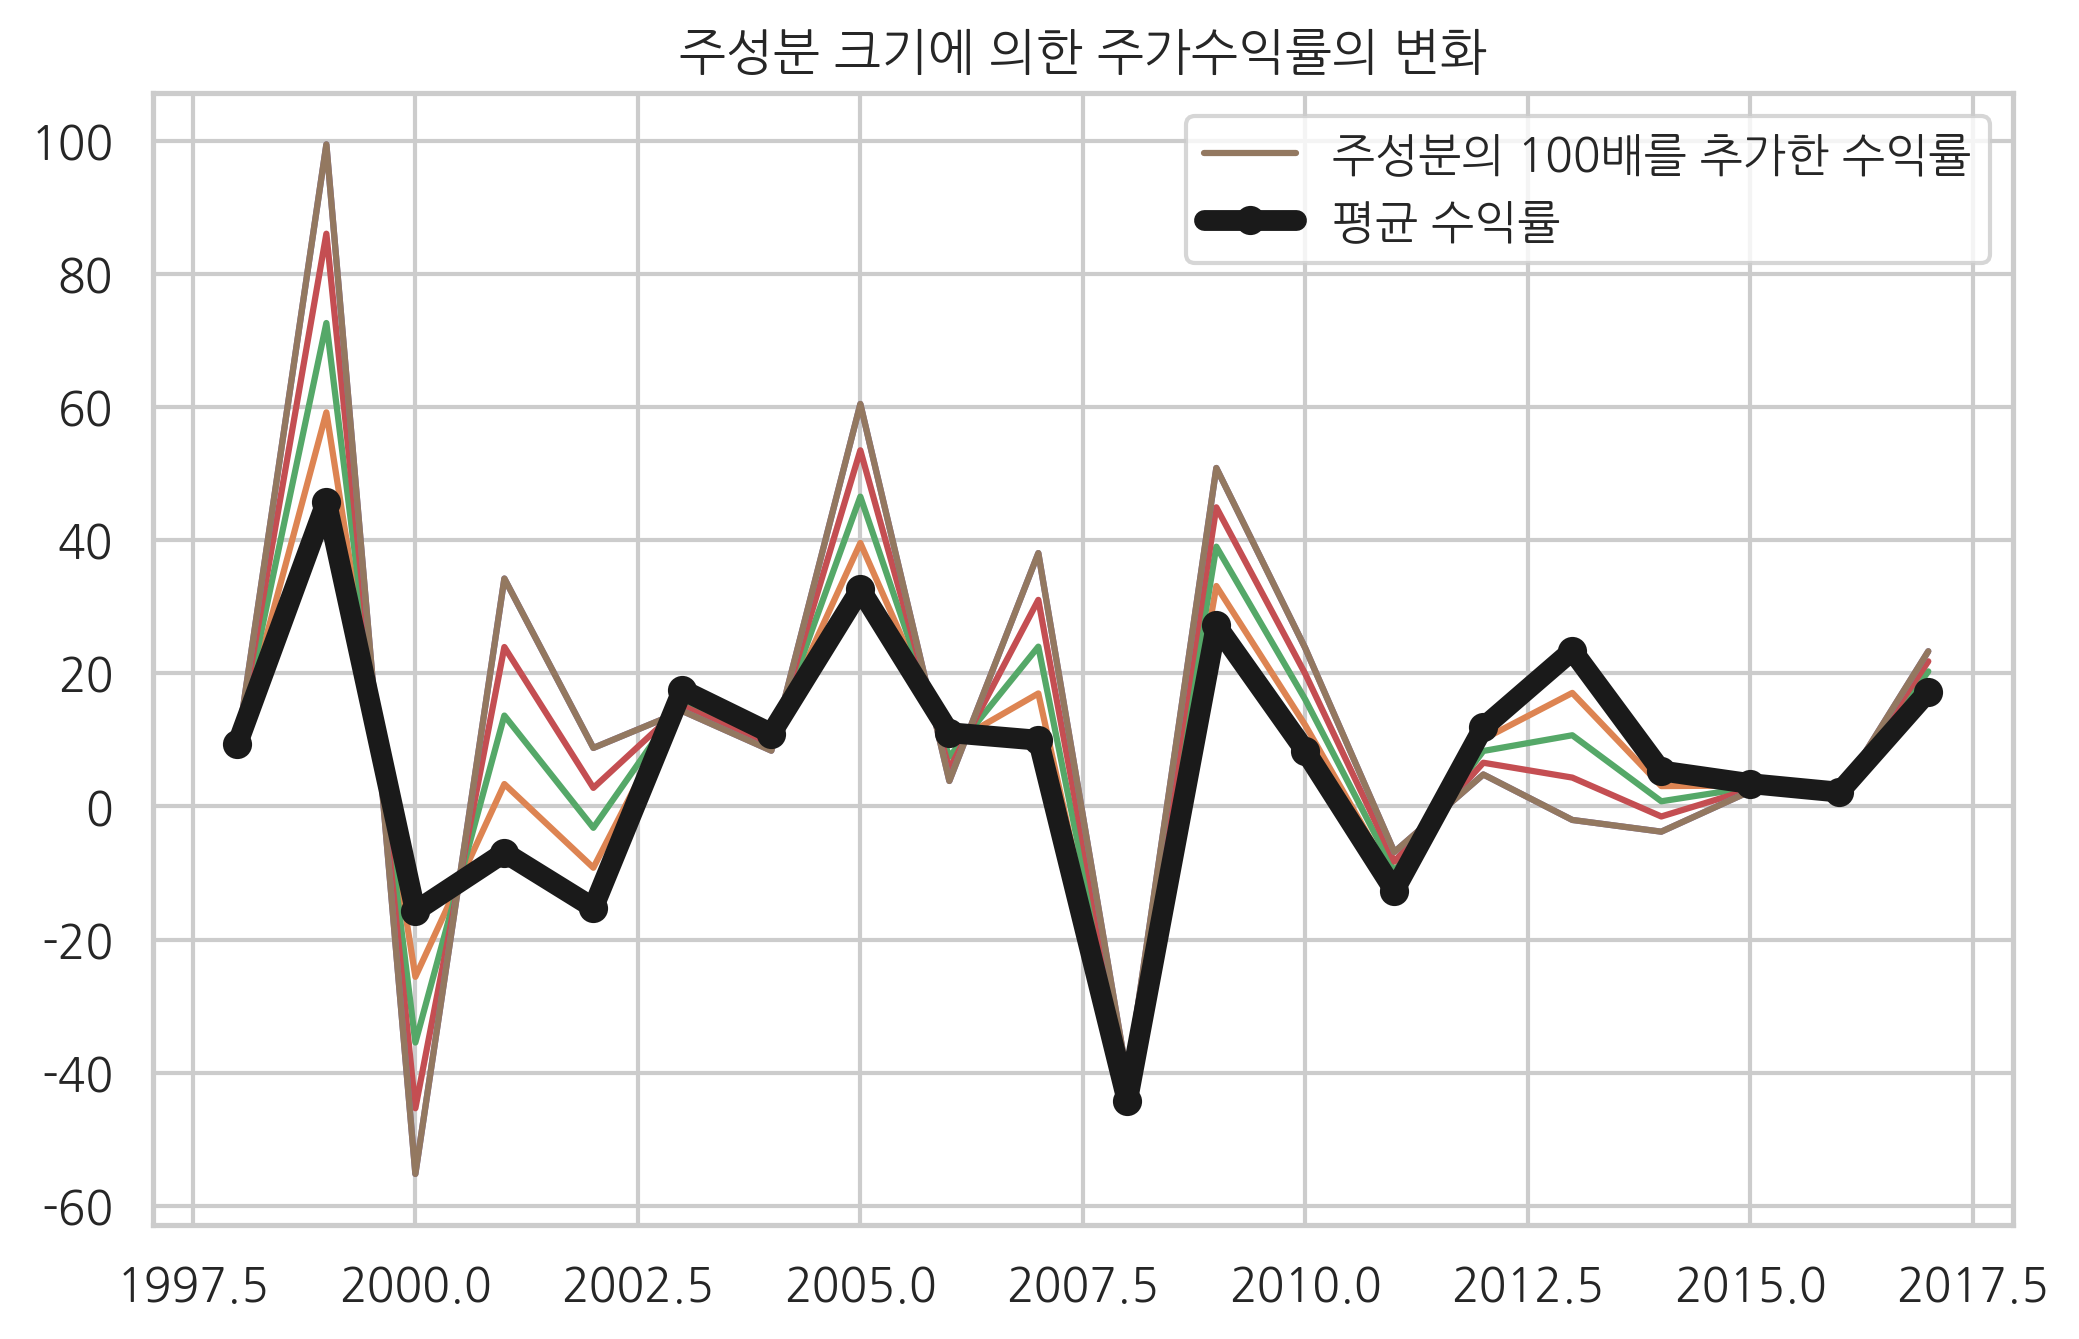

In [37]:
xrange = np.linspace(1998, 2017, 20, dtype=int)
for i in np.linspace(0, 100, 5):
    plt.plot(xrange, pca2.mean_ + p1 * i)
plt.plot(xrange, pca2.mean_ + p1 * 100, label="주성분의 100배를 추가한 수익률")
plt.plot(xrange, pca2.mean_, "ko-", lw=5, label="평균 수익률")
plt.title("주성분 크기에 의한 주가수익률의 변화")
plt.legend()
plt.show()

In [38]:
df_w = pd.DataFrame(w)
df_w.index = df.index
df_w.columns = ["주성분 비중"]
print(df_w)

       주성분 비중
US -33.413784
JP -20.943197
EZ -26.917702
KR  81.274683


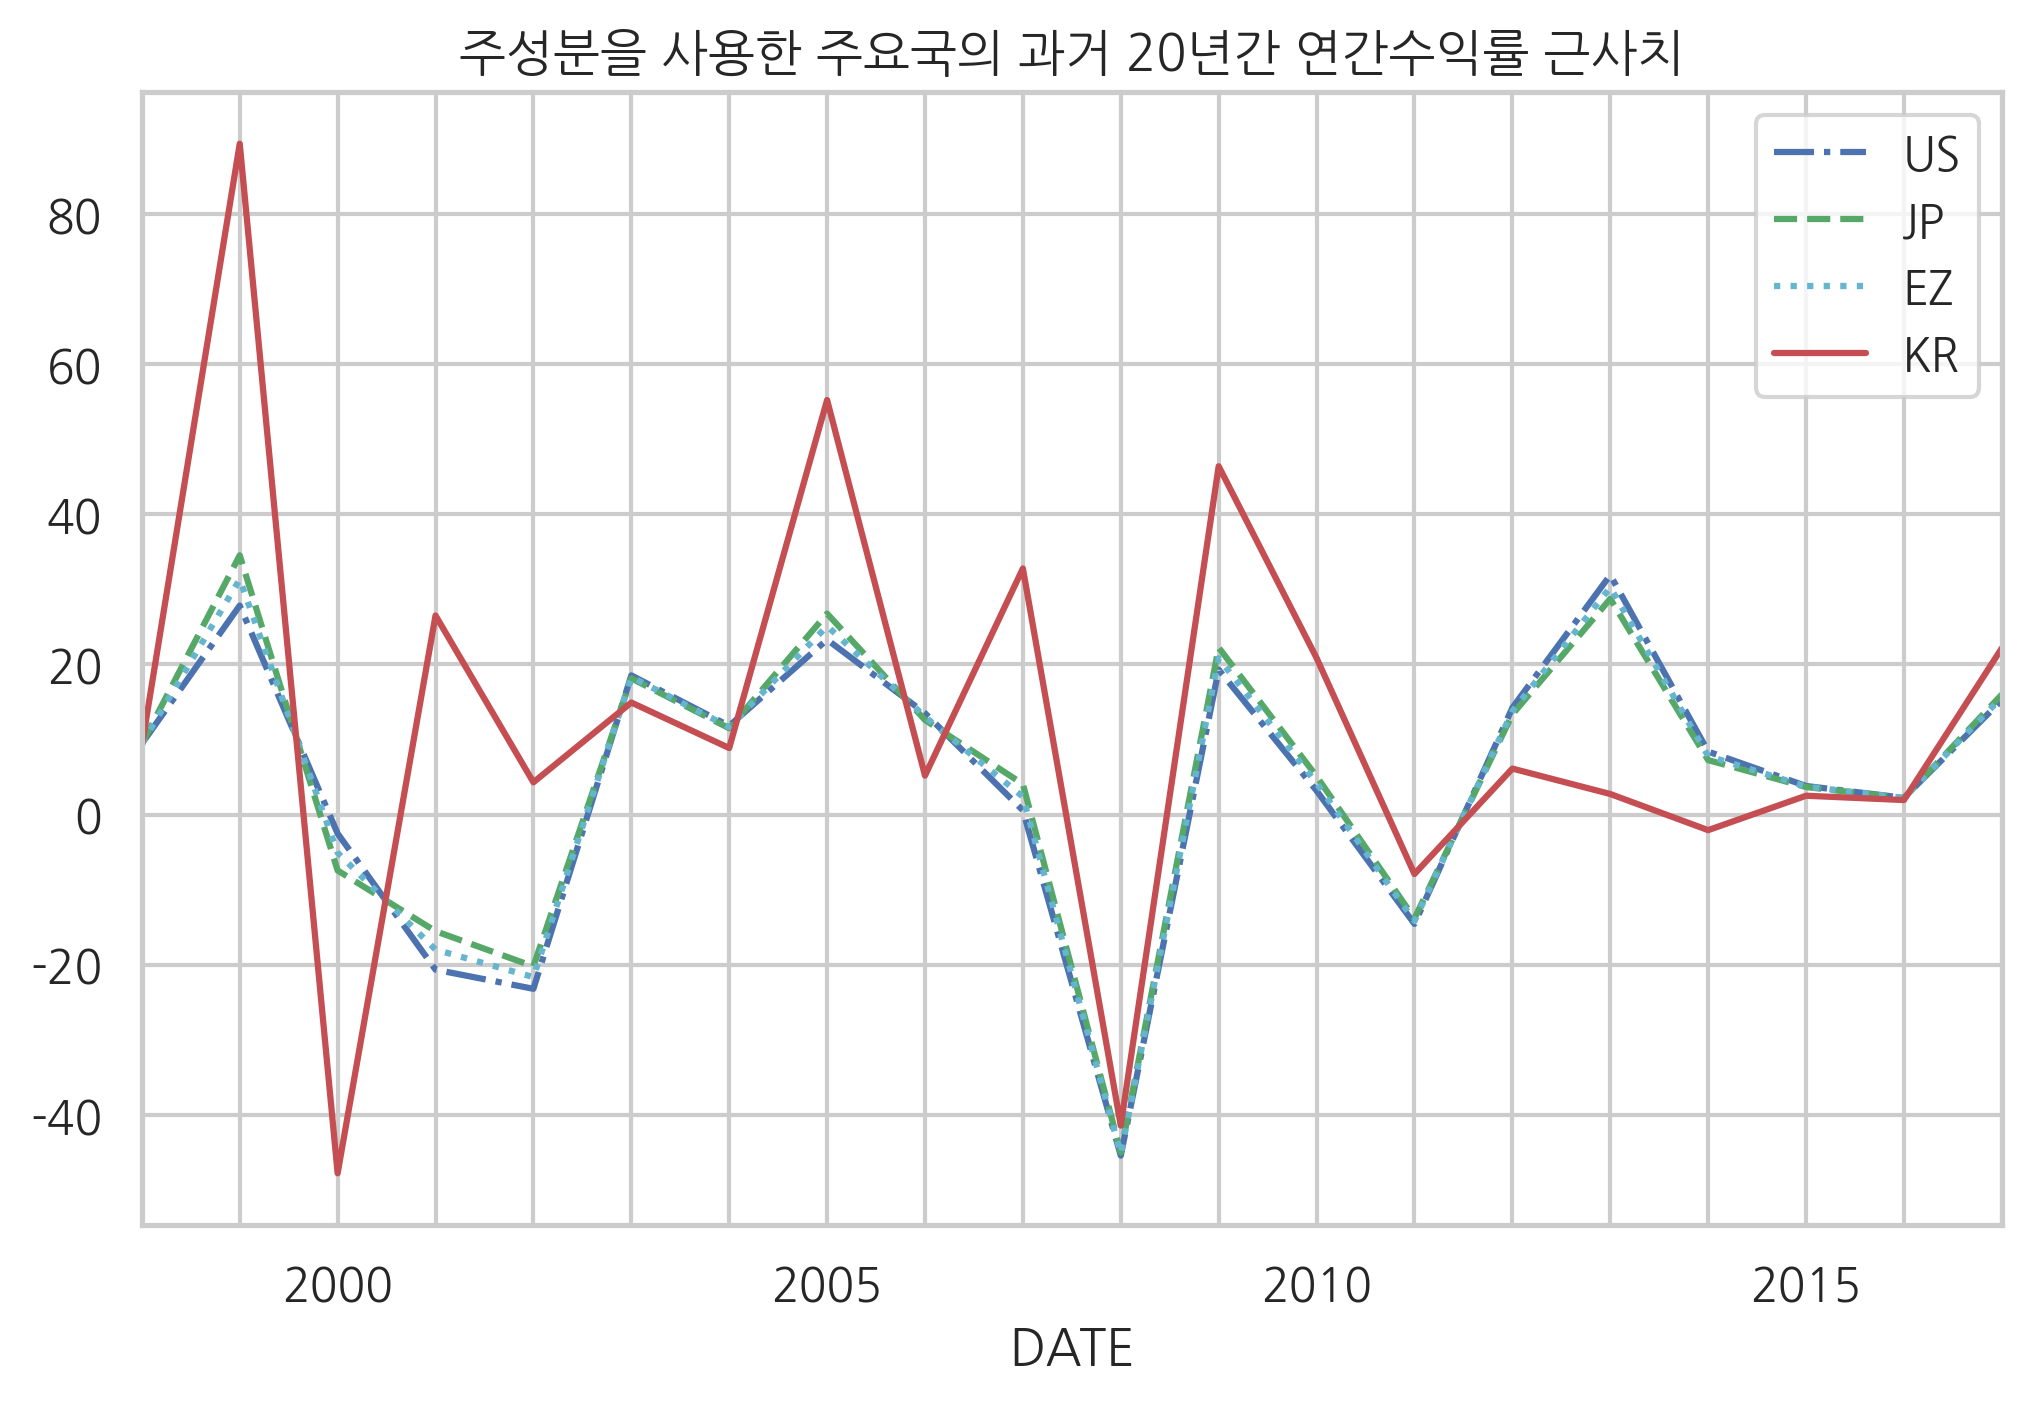

In [39]:
df_i = pd.DataFrame(pca2.inverse_transform(w))
df_i.index = df.index
df_i.columns = df.columns
df_i.iloc[:, -10:]
df_i.T.plot(style=styles)
plt.title("주성분을 사용한 주요국의 과거 20년간 연간수익률 근사치")
plt.xticks(df.columns)
plt.show()